### **Machine Learning II Exam**



Team Members:
- Tashi Chotso 20BDA01
- Merin George 20BDA11
- M J Aishwarya 20BDA42

# INSURANCE FRAUD DETECTION USING MACHINE LEARNING




## WHAT IS INSURANCE FRAUD ?



- Fraud is one of the most significant and well-known issues that insurers confront.A deliberate deceit conducted against or by an insurance business or agent for the goal of financial benefit is referred to as insurance fraud. Applicants, policyholders, third-party claimants, and professionals that provide services to claims may all commit fraud at different points in the transaction. Insurance fraud can also be committed by insurance brokers and corporate workers. Padding, or inflating claims, misrepresenting facts on an insurance application, submitting claims for injuries or damage that never occurred, and staging accidents are all examples of common frauds.



## WHY INSURANCE FRAUD?



- Fraud is one of the most serious concerns confronting insurance businesses today. According to industry statistics, one out of every ten claims is falsely filed. This is a concerning rate, particularly given the number of policyholders that an insurance firm may have. Some users who filed fraudulent claims did so carelessly, making it easier for the company to collect restitution and prosecute the criminals before they drive up premiums for future drivers. Some may be done precisely in order for someone to get away with it. A significant volume of data may be checked in a short period of time using big data analytics. It encompasses a wide range of big data solutions, such as social network analysis and telemetrics. This is the most powerful tool available to insurers in the fight against insurance fraud. (https://www.smartdatacollective.com/why-data-analytics-insurance-industry-is-major-game-changer/)


## PROBLEM STATEMENT:



- This project's purpose is to create a model that can detect car insurance fraud. The difficulty in detecting fraud in machine learning is that frauds are slightly lesser than genuine insurance claims.
- Given the variety of fraud patterns and the limited number of known frauds in typical samples, detecting insurance fraud is a difficult task. When developing detection models, the cost of false warnings must be balanced against the cost of loss avoidance. Machine learning approaches improve forecast accuracy, allowing loss control units to cover more territory with fewer false positives.

## DATASET:



- The car insurance fraud data set we used comprises 1000 rows and 39 columns.
- ***Source***:https://www.bing.com/search?q=kaggle+insurance+data&cvid=42a3af2acf6d42a8aebfceb4dbbcadec&aqs=edge.1.69i57j0l6j69i60l2.12651j0j1&pglt=43&FORM=ANNAB1&PC=U531

<font size="6" color="red">Insurance Fraud Detection </font>



<h2> 1.Import necessary packages </h2>

In [122]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
#data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn libraries needed
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier
#model selection
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder, OneHotEncoder
#model evaluation 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix
#oversampling 
from imblearn.over_sampling import SMOTE


In [123]:
#read csv file using pandas library 
data=pd.read_csv('/content/insurance_claims.csv')

In [124]:
#display top five rows of the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


<h2> 2.Data Preprocessing </h2>
 <p> 1. Finding the missing value</p>
 <p> 2. Null Imputation </p>
 <p> 3. Outlier Analysis </p>

In [125]:
#display number of rows and cols in the dataset
print("The number of records are : ", data.shape[0])
print("The number of features are : ",data.shape[1])
print("The list of features is : ", data.columns)
data.head()

The number of records are :  1000
The number of features are :  40
The list of features is :  Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [126]:
#checking null values in dataset
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [127]:
#checking duplicated value
data.duplicated().sum()

0

In [128]:
#checking unique values
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [129]:
#dispay summary information of the datast
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [130]:
#convert date object to date time data type
data.auto_year=pd.to_datetime(data.auto_year,format="%Y")
data.policy_bind_date=pd.to_datetime(data.policy_bind_date)
data.incident_date=pd.to_datetime(data.incident_date)


In [131]:
data["auto_year_new"] = data["auto_year"].dt.year
data['incident_month']=data['incident_date'].dt.month # incident year is 2015 as all incident happend in 2015
data['policy_bind_year']=data['policy_bind_date'].dt.year
data['policy_bind_month']=data['policy_bind_date'].dt.month

In [132]:
# Remove following columns-
# _c39 -- contains all nan values , so drop them
# insured_zip, policy_number , incident_location ---- Since all the values are unique and can be unique for every person , 
#they don't provide any information ; so, we'll drop these features

data=data.drop(['insured_zip', 'auto_year','policy_number' , 'policy_bind_date','incident_location', '_c39','incident_date'],axis=1)




In [133]:
# collecting index of numerical columns
Int=data.dtypes[data.dtypes=='int64'].index
Float=data.dtypes[data.dtypes=='float64'].index
num_index=Int.append(Float)

# collecting index of categorical columns
categ_index=data.dtypes[data.dtypes=='object'].index

# collecting index of datetime columns
date_index=data.dtypes[data.dtypes=='datetime64[ns]'].index

In [134]:
# descriptive statistic summmary of numerical data 
numdata=data.select_dtypes(exclude=['object'])
print(numdata.shape)
numdata.head(3)

(1000, 19)


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year_new,incident_month,policy_bind_year,policy_bind_month
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,2014,10
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007,1,2006,6
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007,2,2000,9


In [135]:
# Categorical records in the dataset
cate=data.select_dtypes(include=['object'])
print(cate.shape)
cate.head(3)

(1000, 18)


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N


In [136]:
#decriptive statistic summary of category data
cate.describe()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,4,4,5,7,7,3,3,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,?,?,Saab,RAM,N
freq,352,351,537,161,93,64,183,419,292,354,292,262,157,360,343,80,43,753


In [137]:
# afer removing those cols
data.shape

(1000, 37)

In [138]:
# There seem to be "?" in some of the features. So we need to extract those features that contain them to impute some values.

missing_data = []
for col in data.columns:
    if '?' in data[col].values:
        missing_data.append(col)

missing_data

['collision_type', 'property_damage', 'police_report_available']

In [139]:
#checking unique value of collision
from collections import Counter
Counter(data['collision_type'])

Counter({'?': 178,
         'Front Collision': 254,
         'Rear Collision': 292,
         'Side Collision': 276})

In [140]:
#checking unique value of property+damage
Counter(data['property_damage'])

Counter({'?': 360, 'NO': 338, 'YES': 302})

In [141]:
#checking unique value of police_report_available
Counter(data['police_report_available'])

Counter({'?': 343, 'NO': 343, 'YES': 314})

In [142]:
#Imputing the appropriate values
data["collision_type"] = np.where(data["collision_type"] == "?", "Unknown", data["collision_type"])
data["property_damage"] = np.where(data["property_damage"] == "?", "unknown", data["property_damage"])
data["police_report_available"] = np.where(data["police_report_available"] == "?", "unknown",data["police_report_available"])

<h2> 3.Exploratory Data Analysis </h2>
<p> 1.Univariate Analysis <p>
<p>2. Bivariate Analysis </p>
<p> 3. Multivariate Analysis</p>

<p> 1.Univariate Analysis </p>

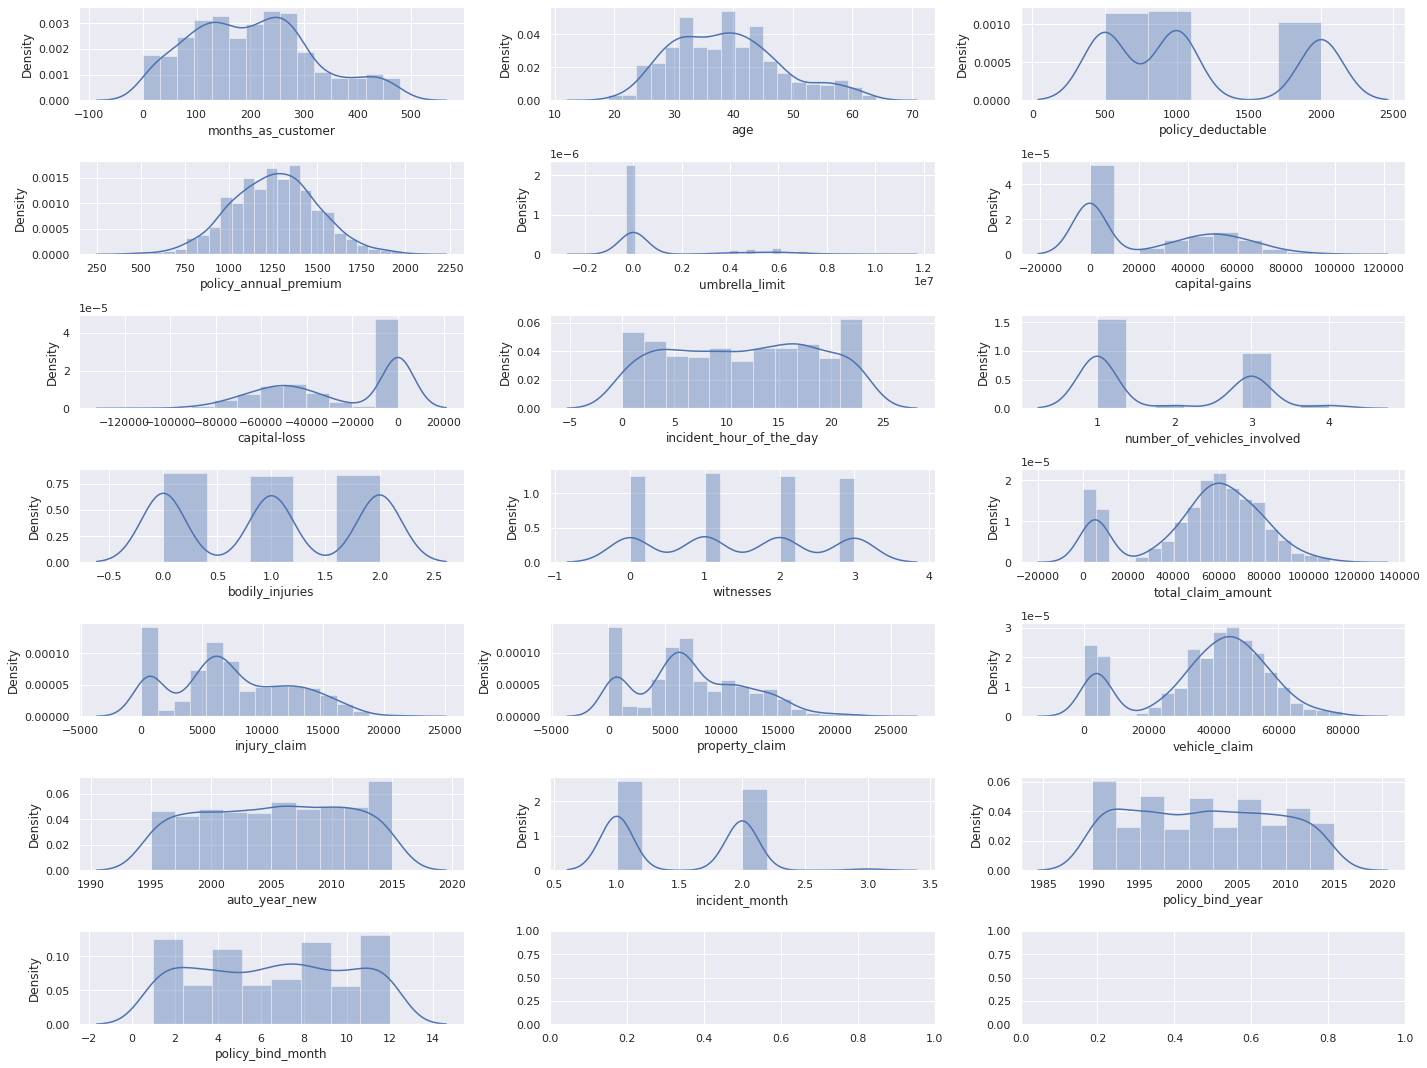

In [143]:
# Checking Distribution of numerical columns

fig,ax=plt.subplots(7,3,figsize=(20,15))

i,j=0,0
for col in numdata:
    sns.distplot(data[col],ax=ax[i,j])
    j+=1
    if j==3:
        i+=1
        j=0

fig.tight_layout()

Text(0.5, 0, ' ')

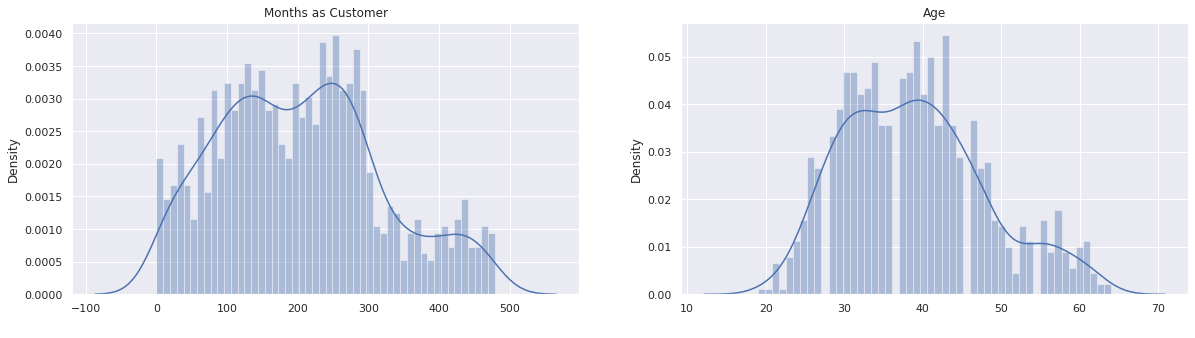

In [144]:
# Checking feature "months_as_customer" and "age"
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_objects

sns.distplot(data["months_as_customer"], bins=50 , ax=ax1)
ax1.set_title("Months as Customer")
ax1.set_xlabel(" ")

sns.distplot(data["age"], bins=50 , ax=ax2)
ax2.set_title("Age")
ax2.set_xlabel(" ")

In [145]:
data[["months_as_customer", "age"]].describe()

,months_as_customer,age
count,1000.000000,1000.000000
mean,203.954000,38.948000
std,115.113174,9.140287
min,0.000000,19.000000
25%,115.750000,32.000000
50%,199.500000,38.000000
75%,276.250000,44.000000
max,479.000000,64.000000


In [146]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
fraud = cate['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

In [147]:
fraud = cate['insured_sex'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'pink']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'gender', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of gender')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

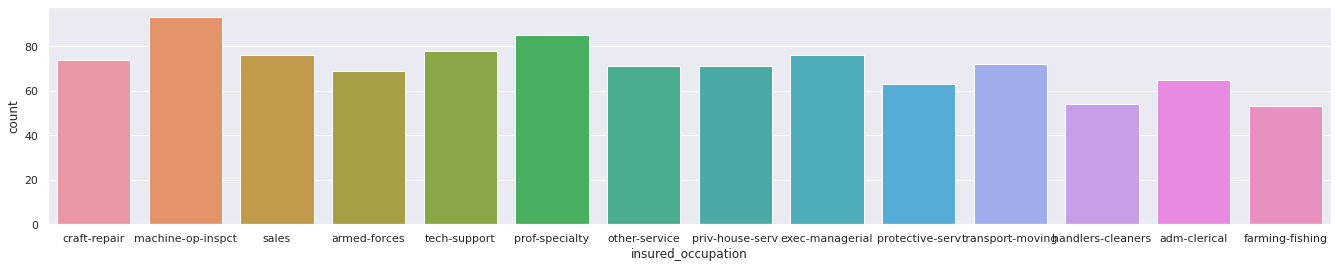

In [148]:
fig, axes = plt.subplots(figsize=(23, 4))
sns.countplot("insured_occupation", data=data)

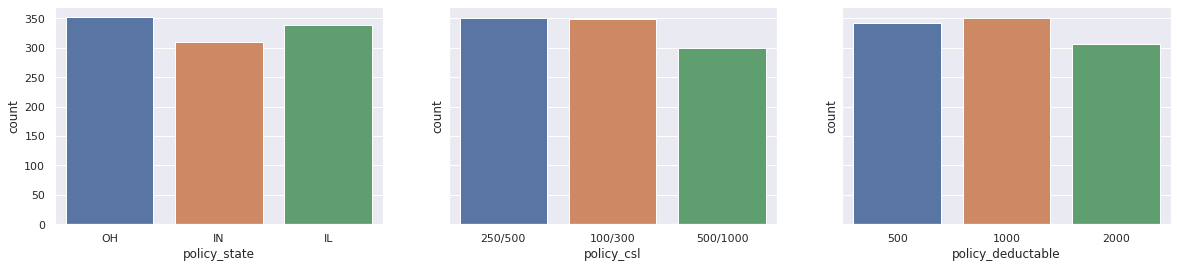

In [149]:
# Plotting the countplot for the few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

sns.countplot("policy_state", data=data, ax=axes[0])
sns.countplot("policy_csl", data=data, ax=axes[1])
sns.countplot("policy_deductable", data=data, ax=axes[2])

The basic statistics for the feature is :
 count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64
The number of unique values in the feature is : 991


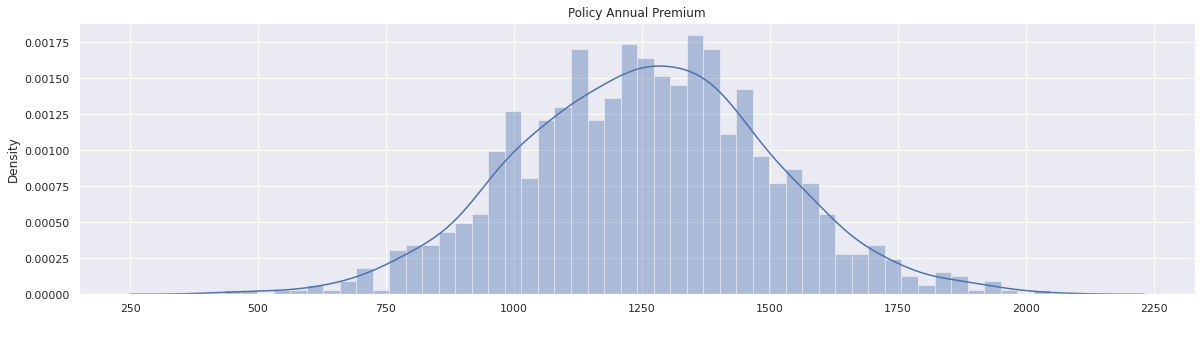

In [150]:
# Checking feature "policy_annual_premium"
#sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["policy_annual_premium"], bins=50 , ax=ax1)
ax1.set_title("Policy Annual Premium")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n",data["policy_annual_premium"].describe())
print("The number of unique values in the feature is :", data["policy_annual_premium"].nunique())

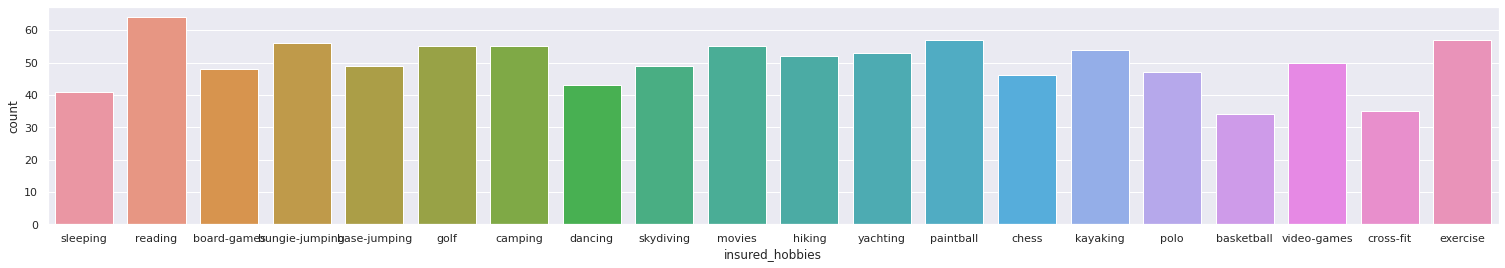

In [151]:
fig, axes = plt.subplots(figsize=(26, 4))
sns.countplot("insured_hobbies", data=data, ax=axes)


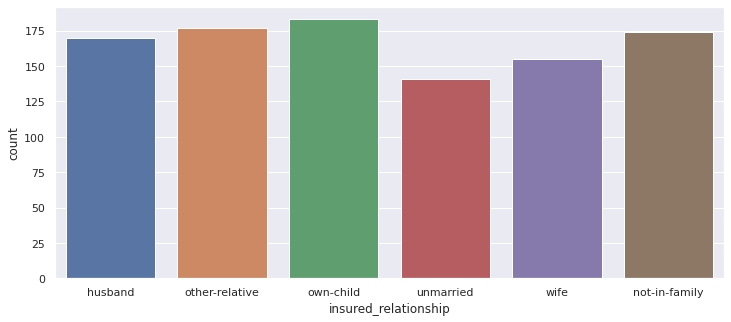

In [152]:
# Plotting the countplot for the "insured_relationship" feature
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot("insured_relationship", data=data)

The basic statistics for the feature is :
 count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64
The number of unique values in the feature is : 338


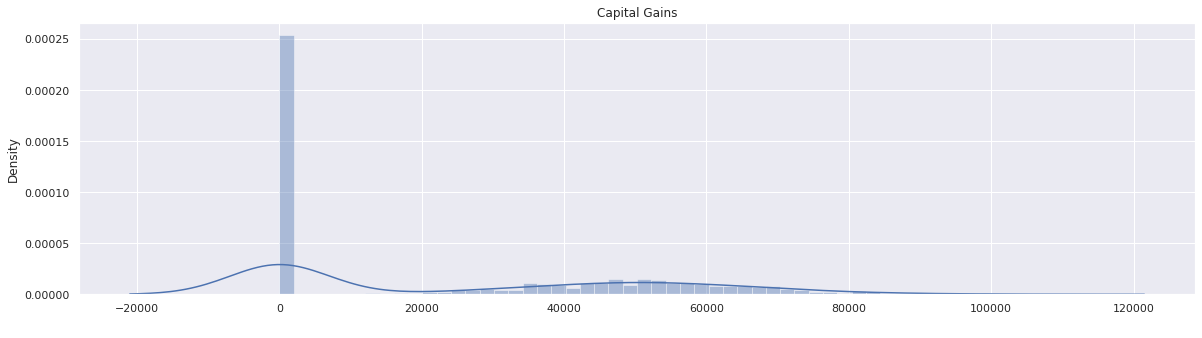

In [153]:
# Checking feature "capital-gains"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["capital-gains"], bins=50 , ax=ax1)
ax1.set_title("Capital Gains")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", data["capital-gains"].describe())
print("The number of unique values in the feature is :",data["capital-gains"].nunique())

The basic statistics for the feature is :
 count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64
The number of unique values in the feature is : 354


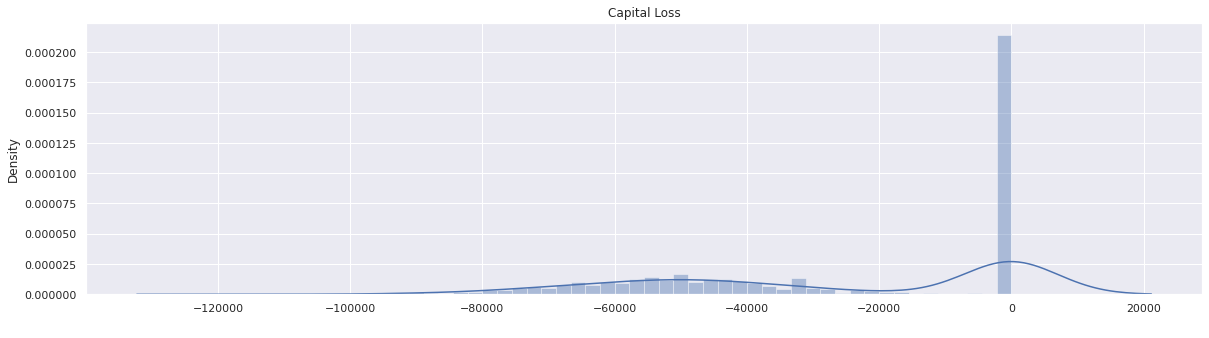

In [154]:
# Checking feature "capital-loss"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["capital-loss"], bins=50 , ax=ax1)
ax1.set_title("Capital Loss")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", data["capital-loss"].describe())
print("The number of unique values in the feature is :",data["capital-loss"].nunique())

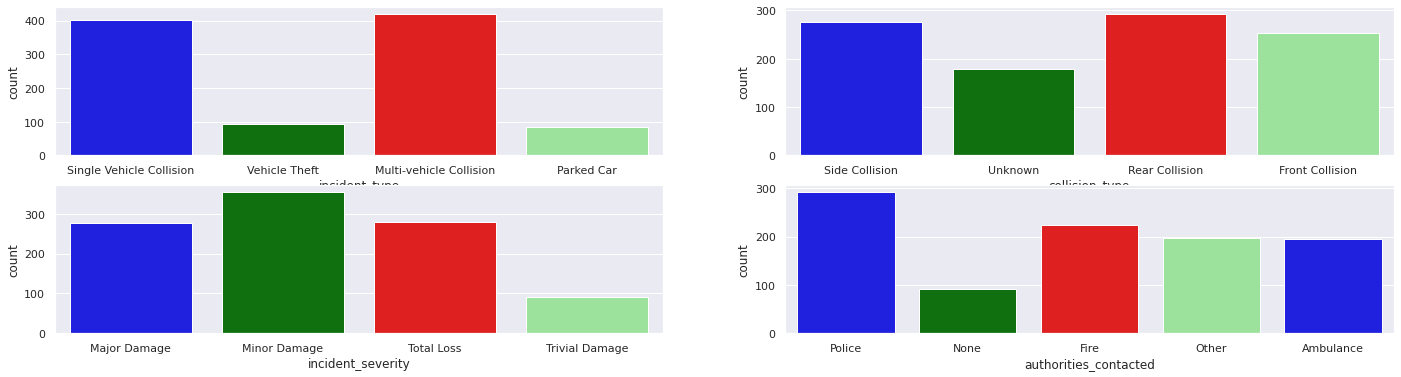

In [155]:
# Plotting the countplot for the "incident_type" feature

fig, axes = plt.subplots(2, 2, figsize=(24, 6))
sns.countplot("incident_type", data=data, ax=axes[0,0],palette=['blue','green','red','lightgreen'])
sns.countplot("collision_type", data=data, ax=axes[0,1],palette=['blue','green','red','lightgreen'])
sns.countplot("incident_severity", data=data, ax=axes[1,0],palette=['blue','green','red','lightgreen'])
sns.countplot("authorities_contacted", data=data, ax=axes[1,1],palette=['blue','green','red','lightgreen'])

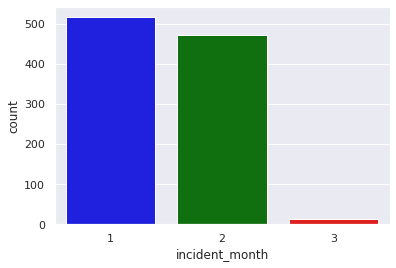

In [156]:

sns.countplot("incident_month", data=data,palette=['blue','green','red'])

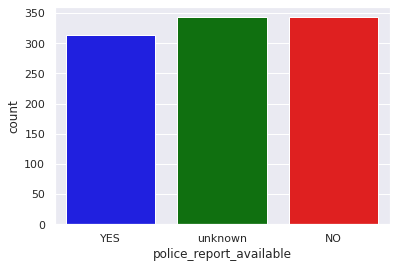

In [157]:
sns.countplot("police_report_available",data=data,palette=['blue','green','red'])

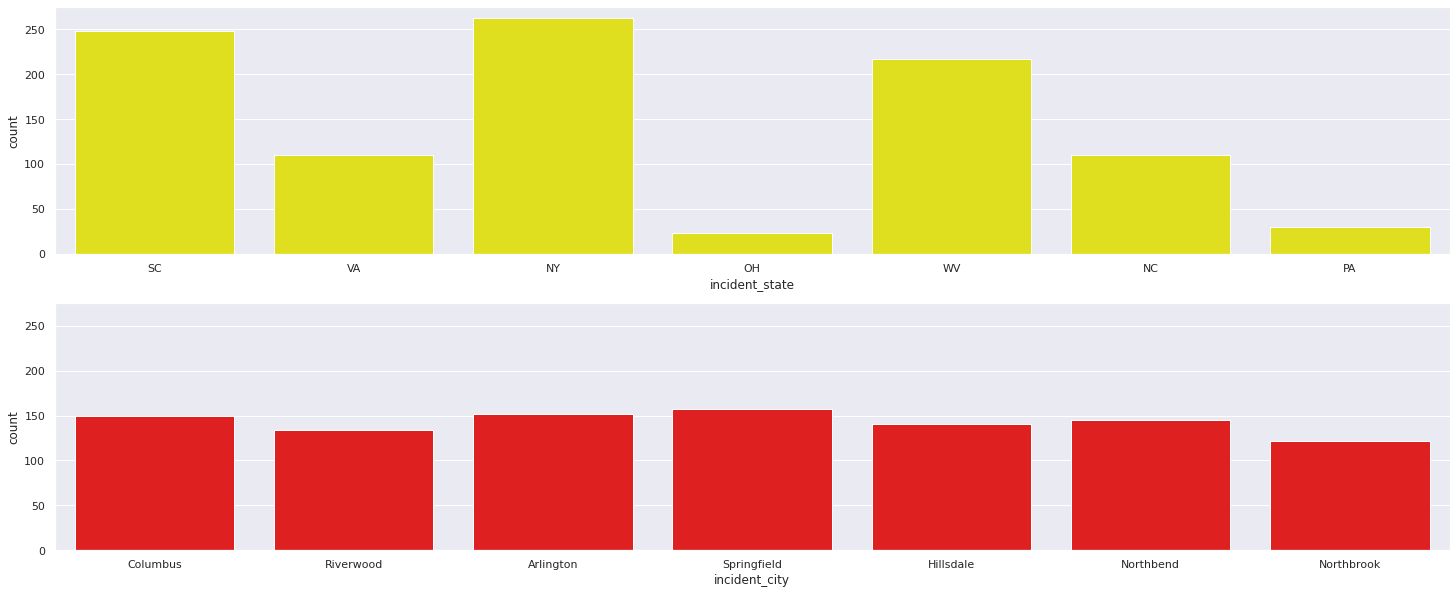

In [158]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)
sns.countplot("incident_state", data=data, ax=axes[0],color='yellow')
sns.countplot("incident_city", data=data, ax=axes[1],color='red')

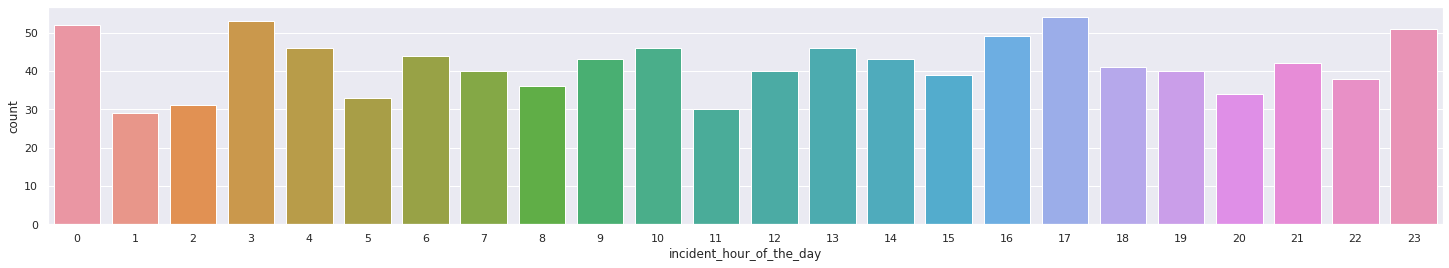

In [159]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("incident_hour_of_the_day", data=data, ax=axes)

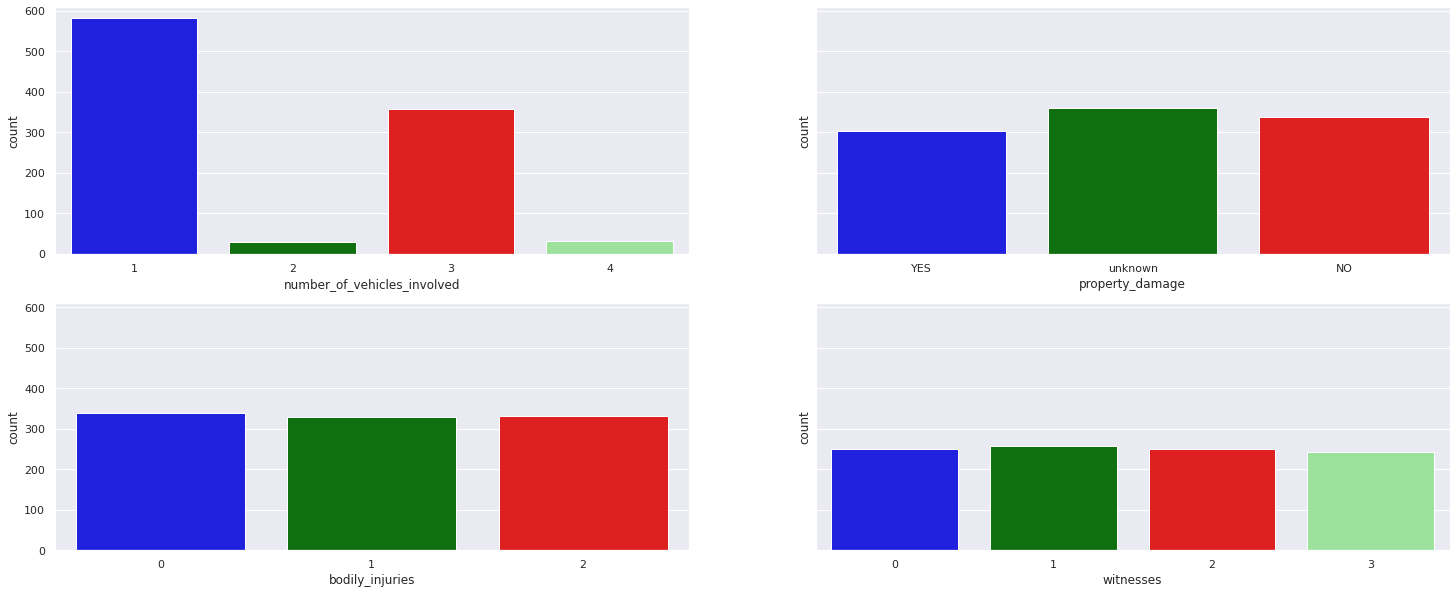

In [160]:
# Plotting the countplot for few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 10), sharey=True)
sns.countplot("number_of_vehicles_involved", data=data, ax=axes[0,0],palette=['blue','green','red','lightgreen'])
sns.countplot("property_damage", data=data, ax=axes[0,1],palette=['blue','green','red','lightgreen'])
sns.countplot("bodily_injuries", data=data, ax=axes[1,0],palette=['blue','green','red','lightgreen'])
sns.countplot("witnesses", data=data, ax=axes[1,1],palette=['blue','green','red','lightgreen'])

The basic statistics for the feature is :
 count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64
The number of unique values in the feature is : 763


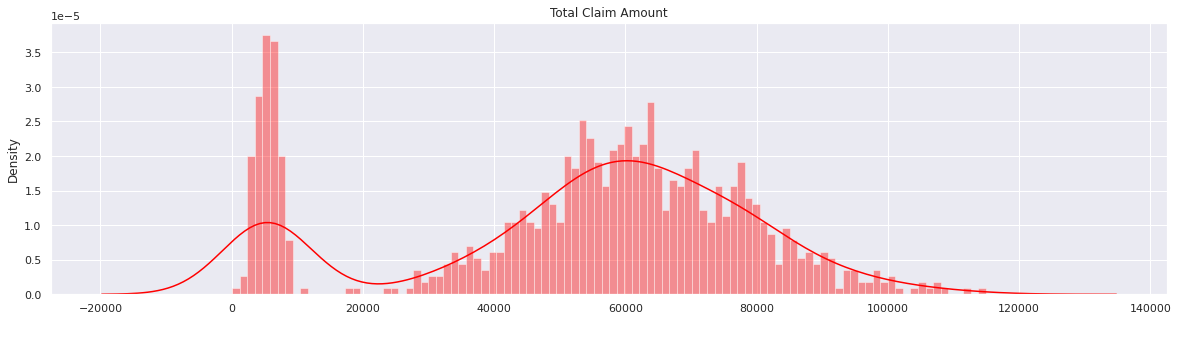

In [161]:
# Checking feature "total_claim_amount"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["total_claim_amount"], bins=100 , ax=ax1,color='red')
ax1.set_title("Total Claim Amount")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", data["total_claim_amount"].describe())
print("The number of unique values in the feature is :", data["total_claim_amount"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean      7433.420000
std       4880.951853
min          0.000000
25%       4295.000000
50%       6775.000000
75%      11305.000000
max      21450.000000
Name: injury_claim, dtype: float64
The number of unique values in the feature is : 638


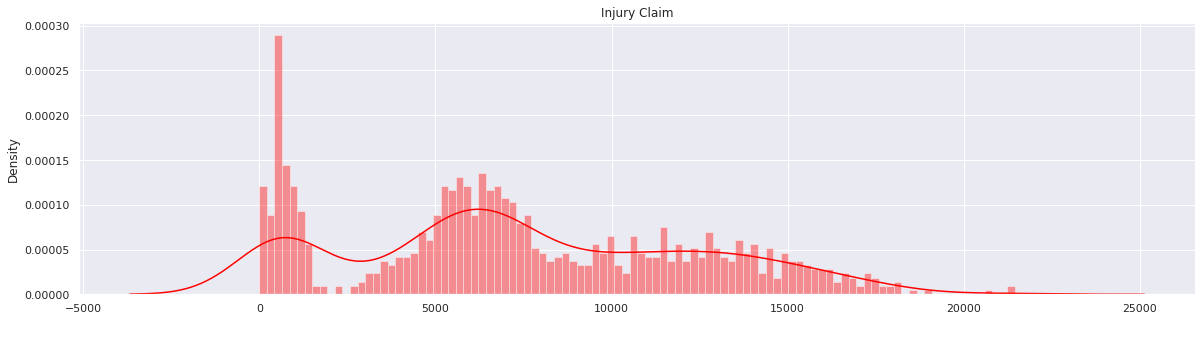

In [162]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["injury_claim"], bins=100 , ax=ax1,color='red')
ax1.set_title("Injury Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", data["injury_claim"].describe())
print("The number of unique values in the feature is :", data["injury_claim"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean      7399.570000
std       4824.726179
min          0.000000
25%       4445.000000
50%       6750.000000
75%      10885.000000
max      23670.000000
Name: property_claim, dtype: float64
The number of unique values in the feature is : 626


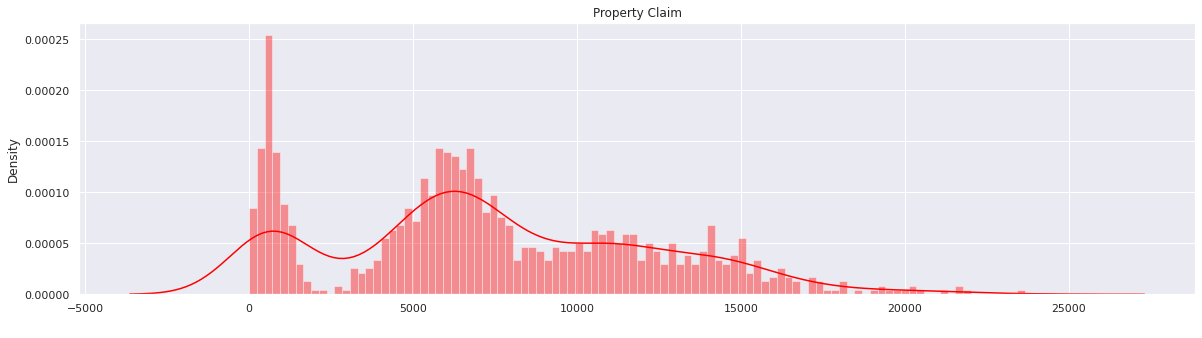

In [163]:
# Checking feature "property_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["property_claim"], bins=100 , ax=ax1,color='red')
ax1.set_title("Property Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", data["property_claim"].describe())
print("The number of unique values in the feature is :", data["property_claim"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean     37928.950000
std      18886.252893
min         70.000000
25%      30292.500000
50%      42100.000000
75%      50822.500000
max      79560.000000
Name: vehicle_claim, dtype: float64
The number of unique values in the feature is : 726


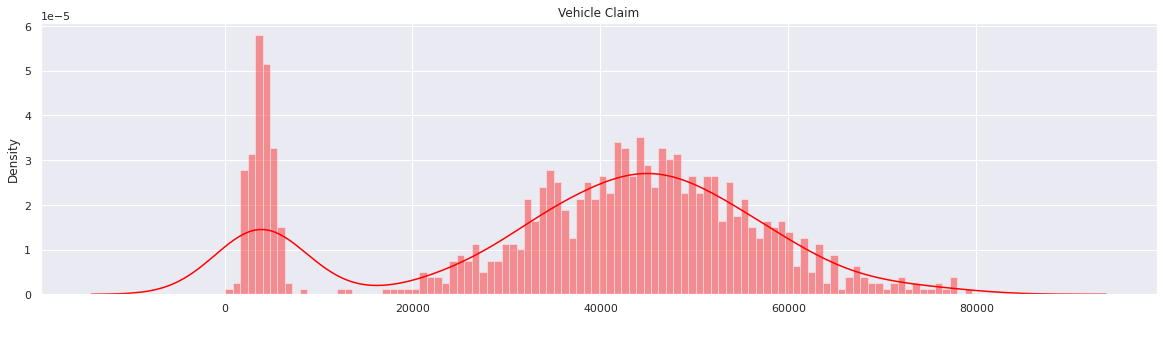

In [164]:
# Checking feature "vehicle_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(data["vehicle_claim"], bins=100 , ax=ax1,color='red')
ax1.set_title("Vehicle Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", data["vehicle_claim"].describe())
print("The number of unique values in the feature is :", data["vehicle_claim"].nunique())

In [165]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,auto_year_new,incident_month,policy_bind_year,policy_bind_month
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,2004,1,2014,10
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,unknown,0,0,unknown,5070,780,780,3510,Mercedes,E400,Y,2007,1,2006,6
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,2007,2,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,2014,1,1990,5
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,2009,2,2014,6


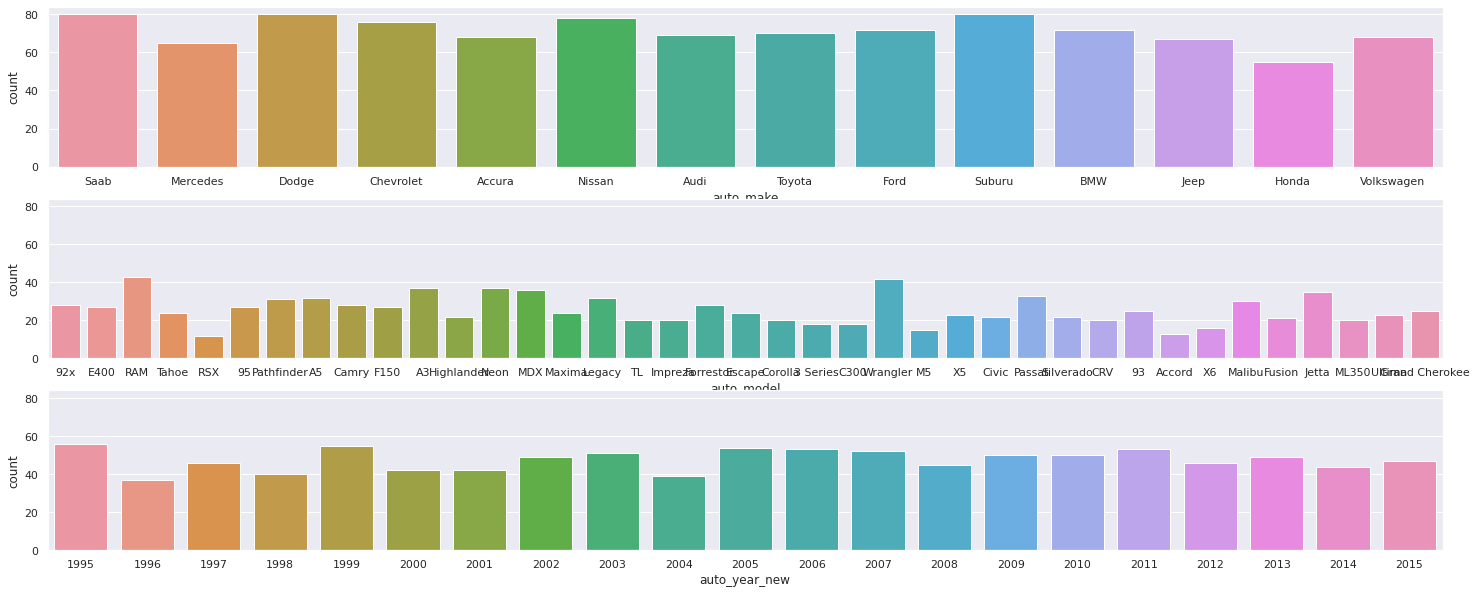

In [166]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 1, figsize=(25, 10), sharey=True)
sns.countplot("auto_make", data=data, ax=axes[0])
sns.countplot("auto_model", data=data, ax=axes[1])
sns.countplot("auto_year_new", data=data, ax=axes[2])

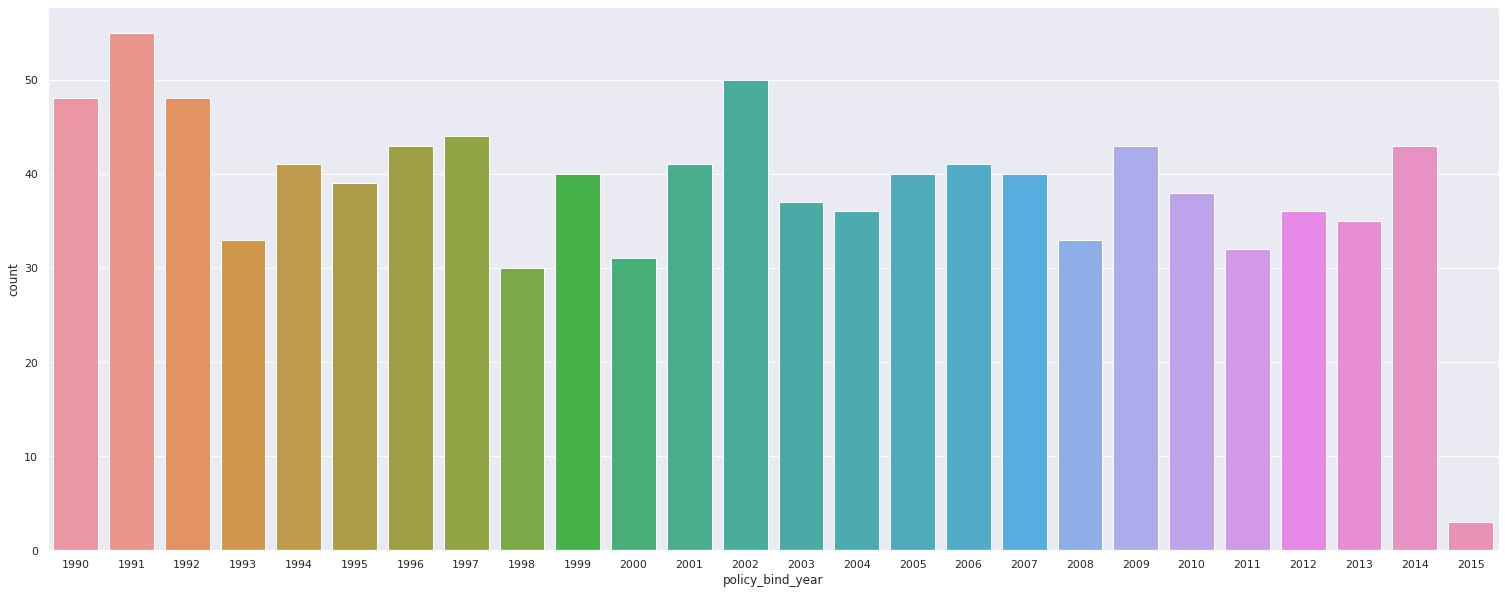

In [167]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(26, 10), sharey=True)
sns.countplot("policy_bind_year", data=data, ax=axes)

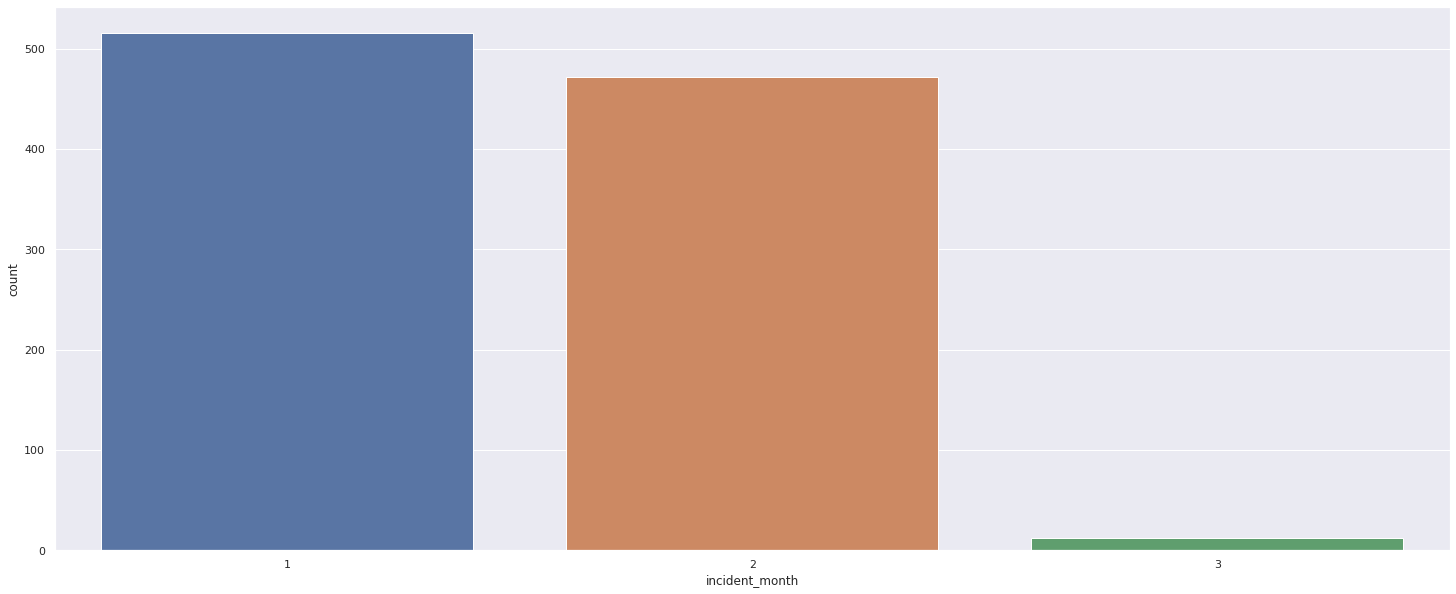

In [168]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 10), sharey=True)
sns.countplot("incident_month", data=data, ax=axes)

# correlation

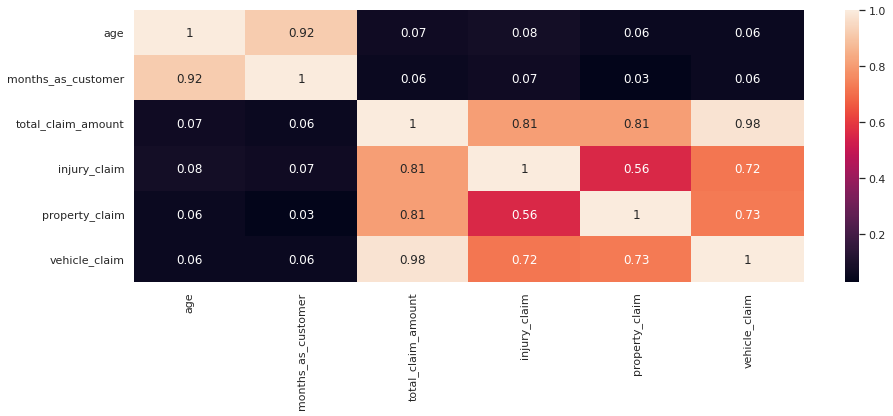

In [169]:
# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corlst=['age','months_as_customer','total_claim_amount', 'injury_claim', 'property_claim','vehicle_claim', 'incident_severity','fraud_reported']

corr_data = data[corlst]
corr=round(corr_data.corr(),2)
fix, ax = plt.subplots(figsize=(15,5))
ax = sns.heatmap(corr, ax=ax,annot=True)
plt.show()

In [170]:
# encoding 
fraud_map={'Y':1,'N':0}
data.fraud_reported =data.fraud_reported.map(fraud_map)

<p>3. Multivariate Analysis</*p*>

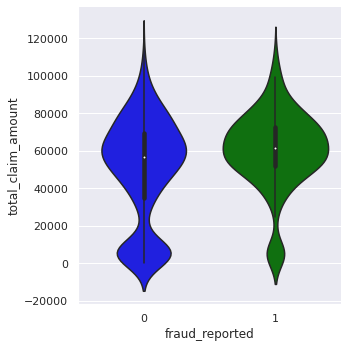

In [171]:

sns.catplot(data=data, x="fraud_reported", y="total_claim_amount", kind='violin',palette=['blue','green'])

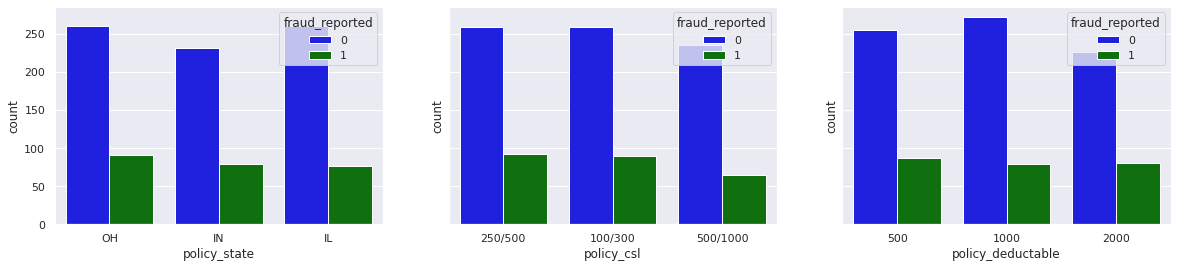

In [172]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
sns.countplot(x="policy_state", data=data, hue="fraud_reported", ax=axes[0],palette=['blue','green'])
sns.countplot(x="policy_csl", data=data, hue="fraud_reported", ax=axes[1],palette=['blue','green'])
sns.countplot(x="policy_deductable", data=data, hue="fraud_reported", ax=axes[2],palette=['blue','green'])


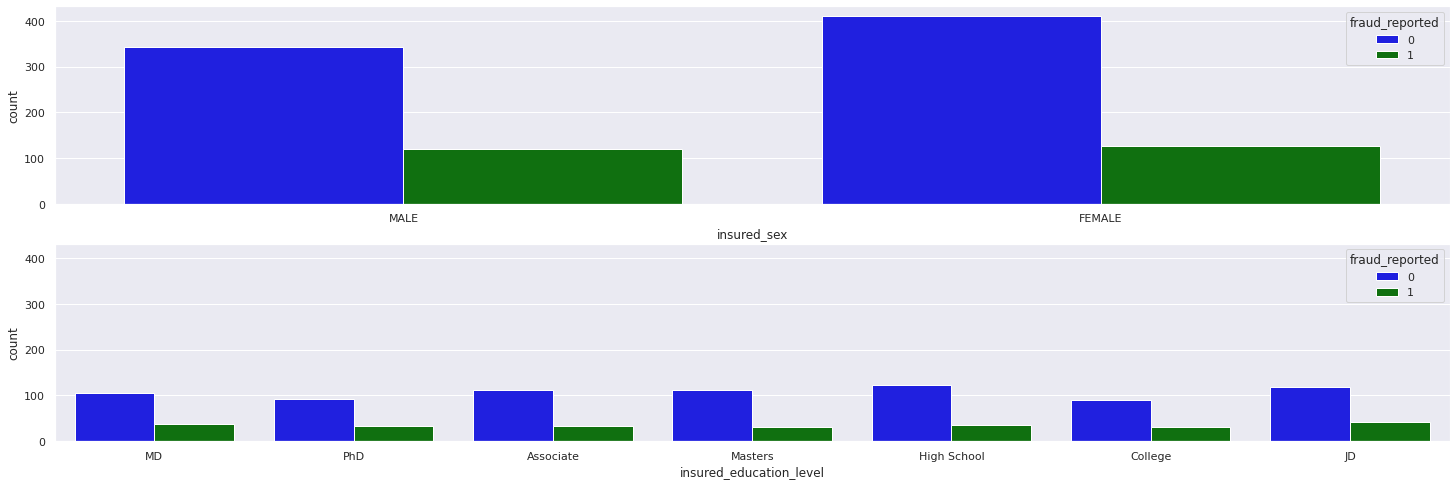

In [173]:
# Plotting nuumber of customer in fraud report base on gender, education level

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="insured_sex", data=data, hue="fraud_reported", ax=axes[0],palette=['blue','green'])
sns.countplot(x="insured_education_level", data=data, hue="fraud_reported", ax=axes[1],palette=['blue','green'])

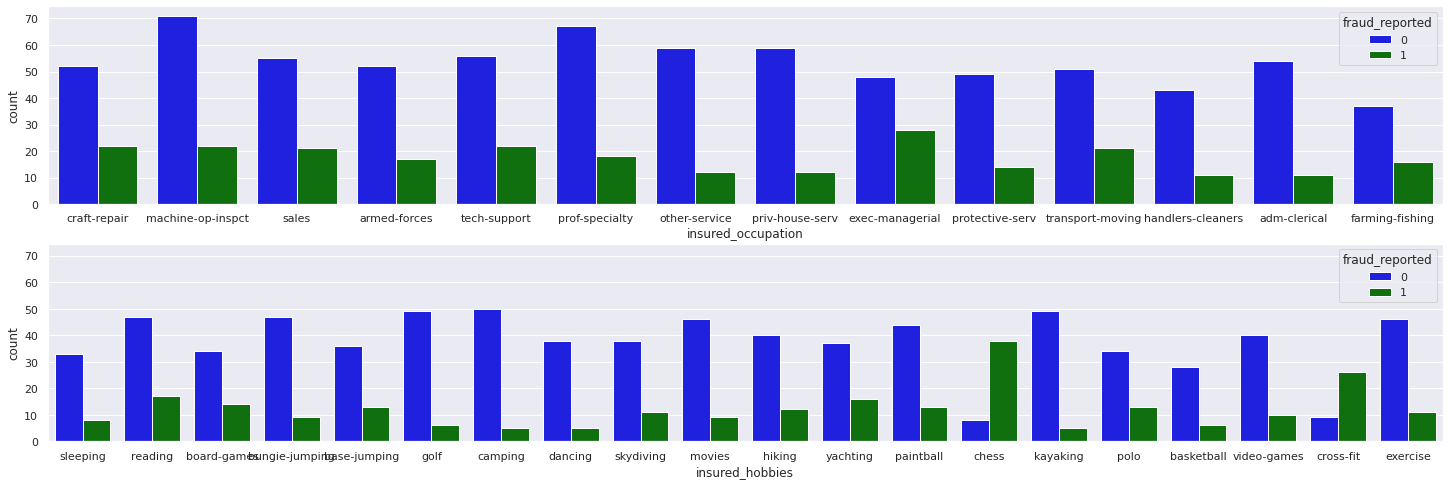

In [174]:
#plotting num of cutomer in fraud report w.r.t occupatin and thier hobbies
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="insured_occupation", data=data, hue="fraud_reported", ax=axes[0],palette=['blue','green'])
sns.countplot(x="insured_hobbies", data=data, hue="fraud_reported", ax=axes[1],palette=['blue','green'])

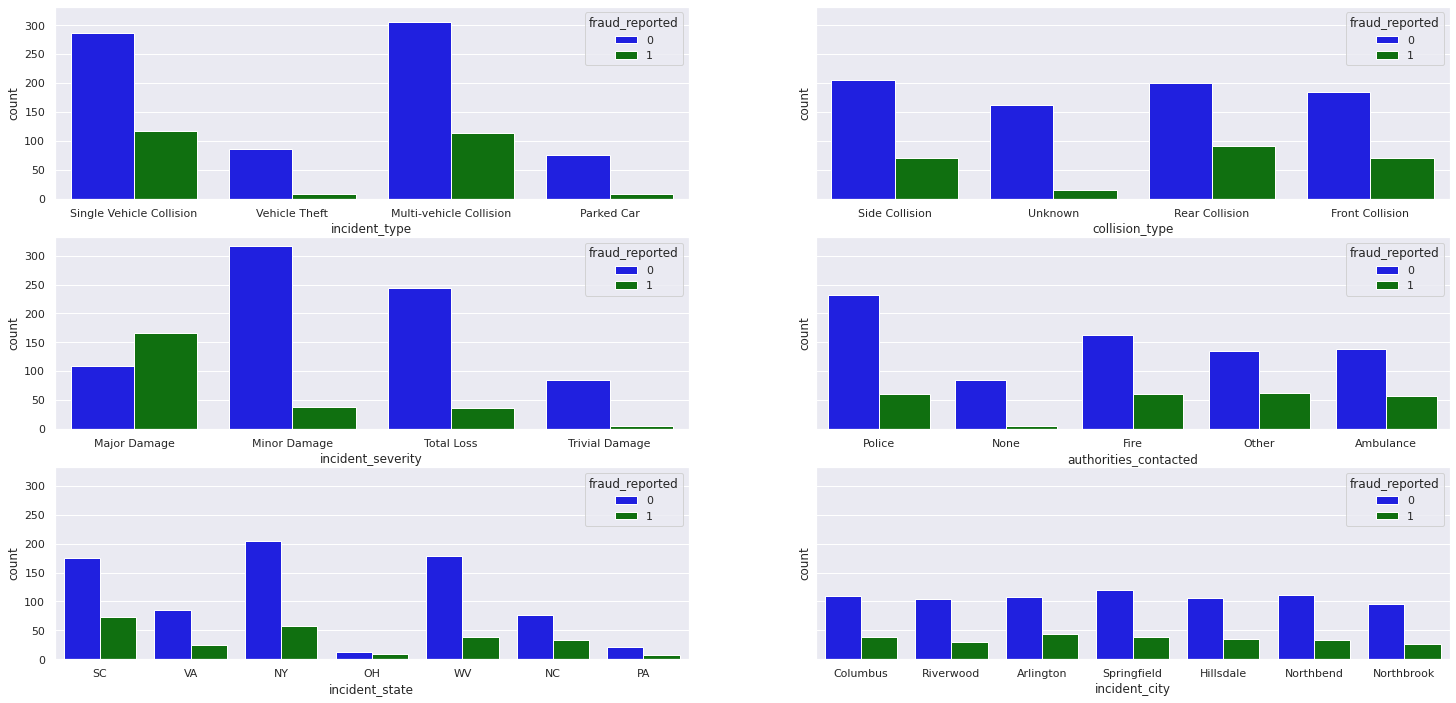

In [175]:
# Plotting number of cutomer in fraud reported based incident type, collision type, incident serverty, stae,city 

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="incident_type", data=data, hue="fraud_reported", ax=axes[0,0],palette=['blue','green'])
sns.countplot(x="collision_type", data=data, hue="fraud_reported", ax=axes[0,1],palette=['blue','green'])
sns.countplot(x="incident_severity", data=data, hue="fraud_reported", ax=axes[1,0],palette=['blue','green'])
sns.countplot(x="authorities_contacted", data=data, hue="fraud_reported", ax=axes[1,1],palette=['blue','green'])
sns.countplot(x="incident_state", data=data, hue="fraud_reported", ax=axes[2,0],palette=['blue','green'])
sns.countplot(x="incident_city", data=data, hue="fraud_reported", ax=axes[2,1],palette=['blue','green'])

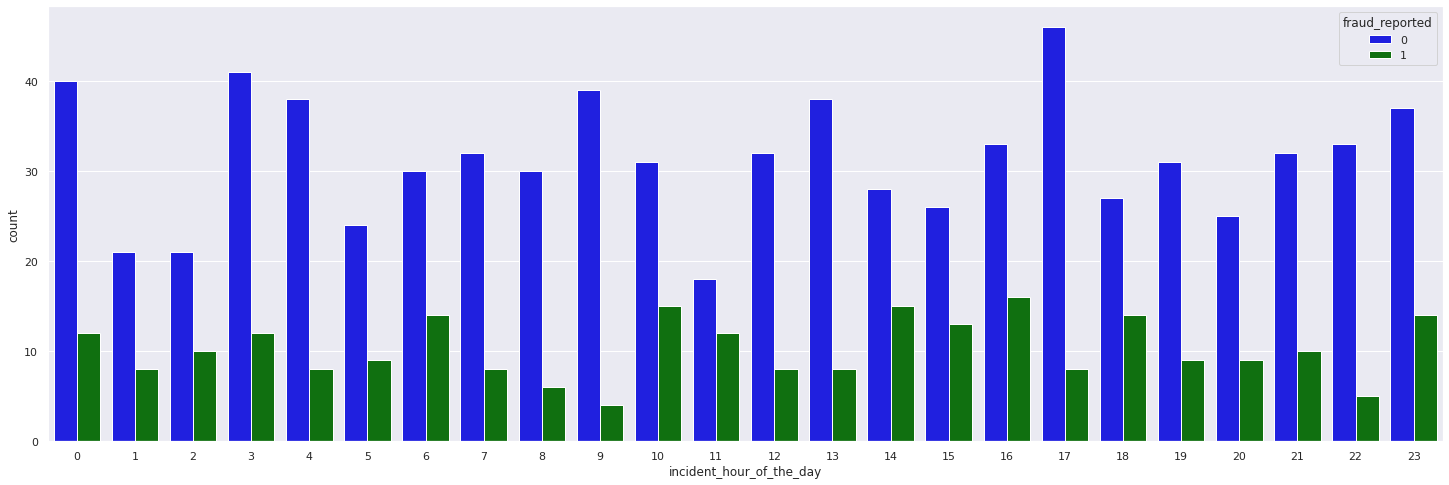

In [176]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="incident_hour_of_the_day", data=data, hue="fraud_reported",palette=['blue','green'])

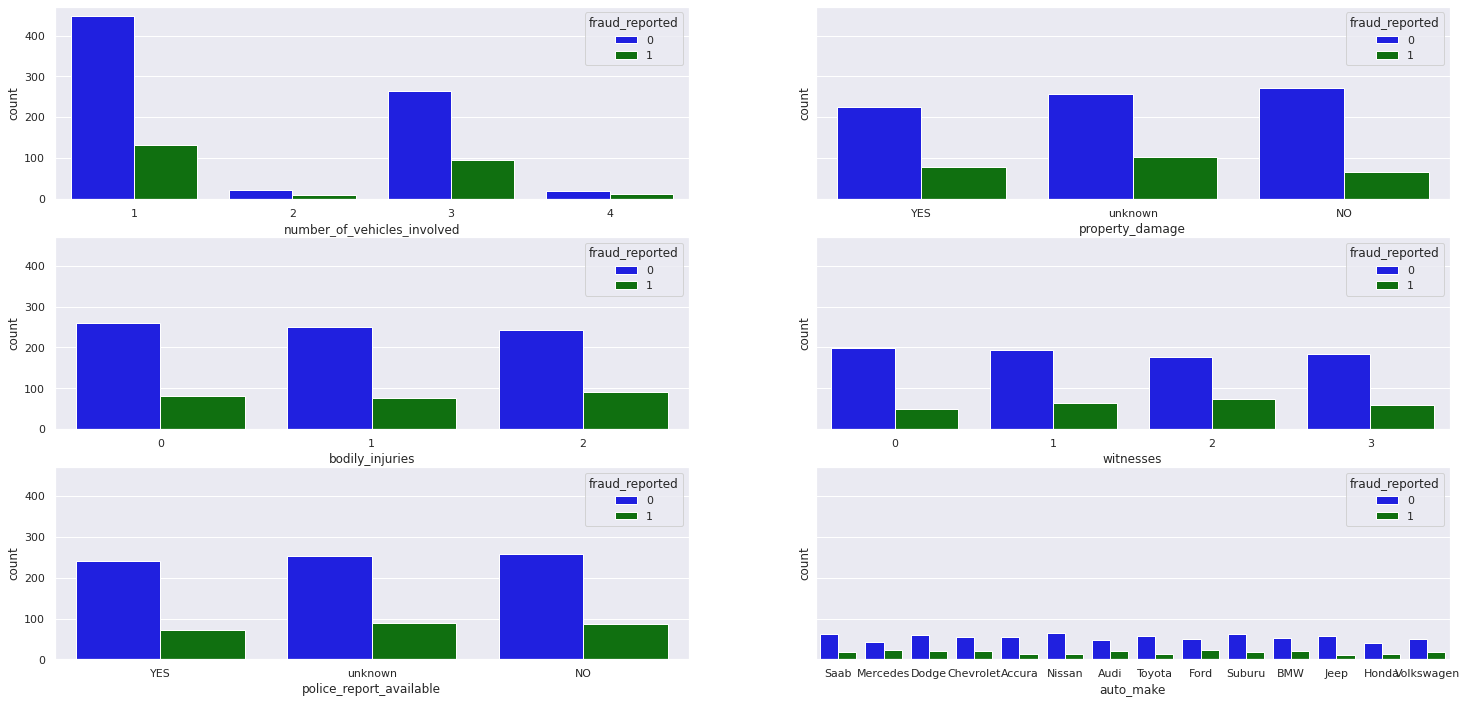

In [177]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="number_of_vehicles_involved", data=data, hue="fraud_reported", ax=axes[0,0],palette=['blue','green'])
sns.countplot(x="property_damage", data=data, hue="fraud_reported", ax=axes[0,1],palette=['blue','green'])
sns.countplot(x="bodily_injuries", data=data, hue="fraud_reported", ax=axes[1,0],palette=['blue','green'])
sns.countplot(x="witnesses", data=data, hue="fraud_reported", ax=axes[1,1],palette=['blue','green'])
sns.countplot(x="police_report_available", data=data, hue="fraud_reported", ax=axes[2,0],palette=['blue','green'])
sns.countplot(x="auto_make", data=data, hue="fraud_reported", ax=axes[2,1],palette=['blue','green'])

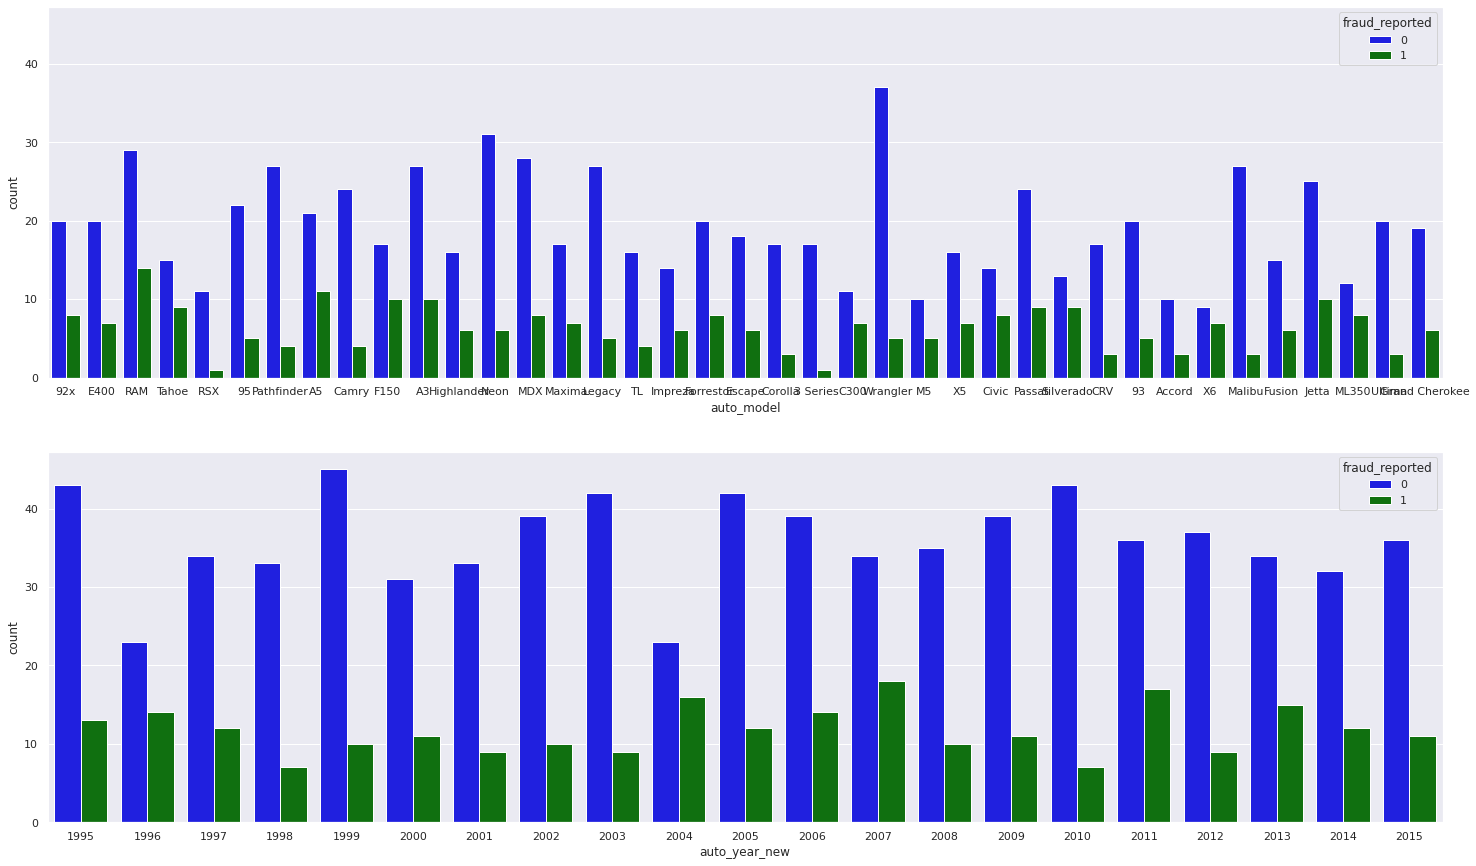

In [178]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 15), sharey=True)
sns.countplot(x="auto_model", data=data, hue="fraud_reported", ax=axes[0],palette=['blue','green'])
sns.countplot(x="auto_year_new", data=data, hue="fraud_reported", ax=axes[1],palette=['blue','green'])

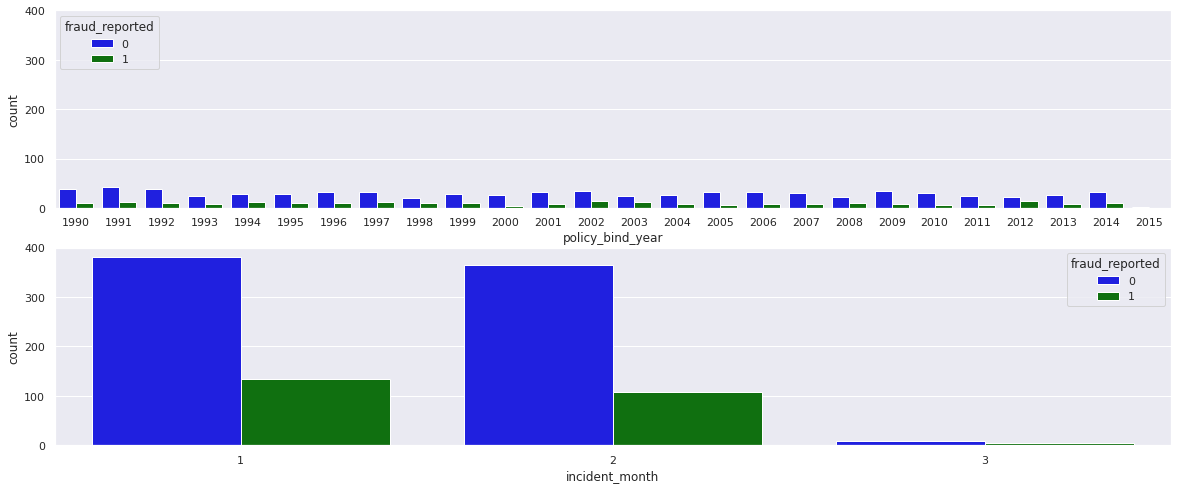

In [179]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharey=True)
sns.countplot(x="policy_bind_year", data=data, hue="fraud_reported", ax=axes[0],palette=['blue','green'])
sns.countplot(x="incident_month", data=data, hue="fraud_reported", ax=axes[1],palette=['blue','green'])

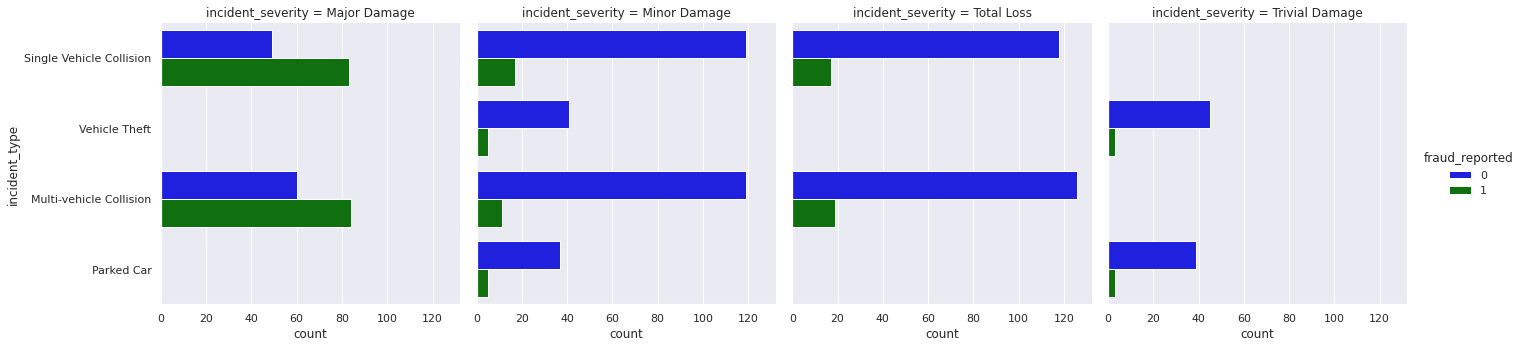

In [180]:
#severity and claims and fraud

sns.catplot(y="incident_type", col="incident_severity", hue="fraud_reported", data=data, palette=['blue','green'], kind="count")

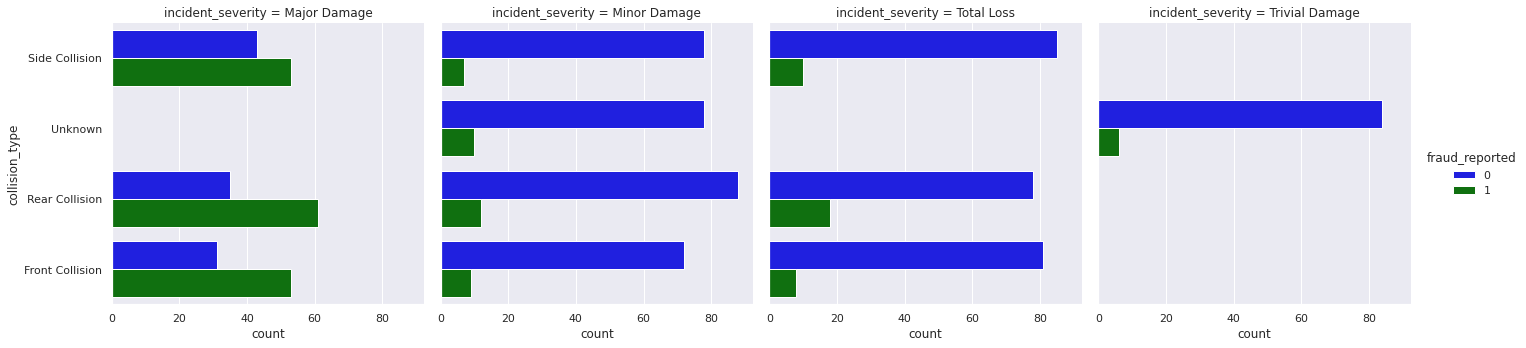

In [181]:
sns.catplot(y="collision_type", col="incident_severity", hue="fraud_reported", data=data, palette=['blue','green'], kind="count")

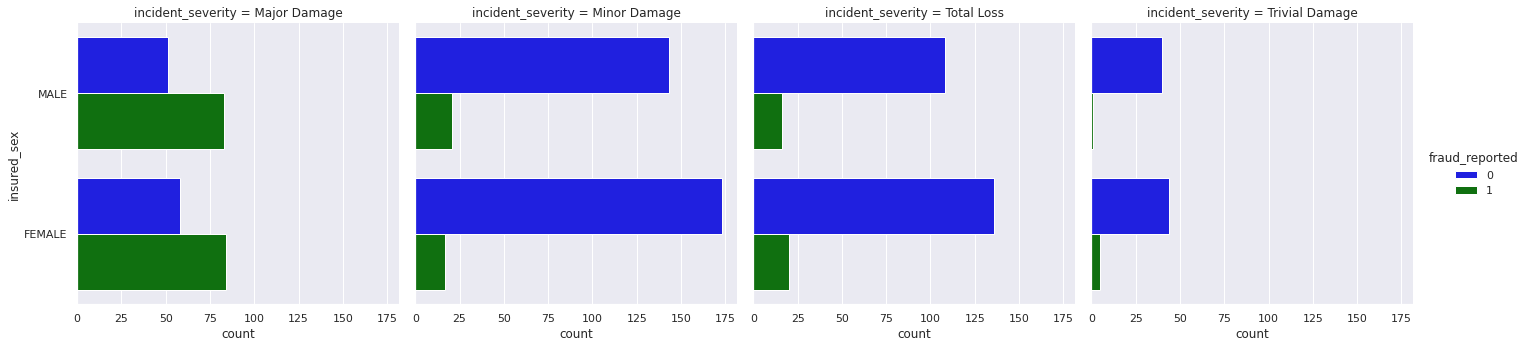

In [182]:
sns.catplot(y="insured_sex", col="incident_severity", hue="fraud_reported", data=data,palette=['blue','green'], kind="count")

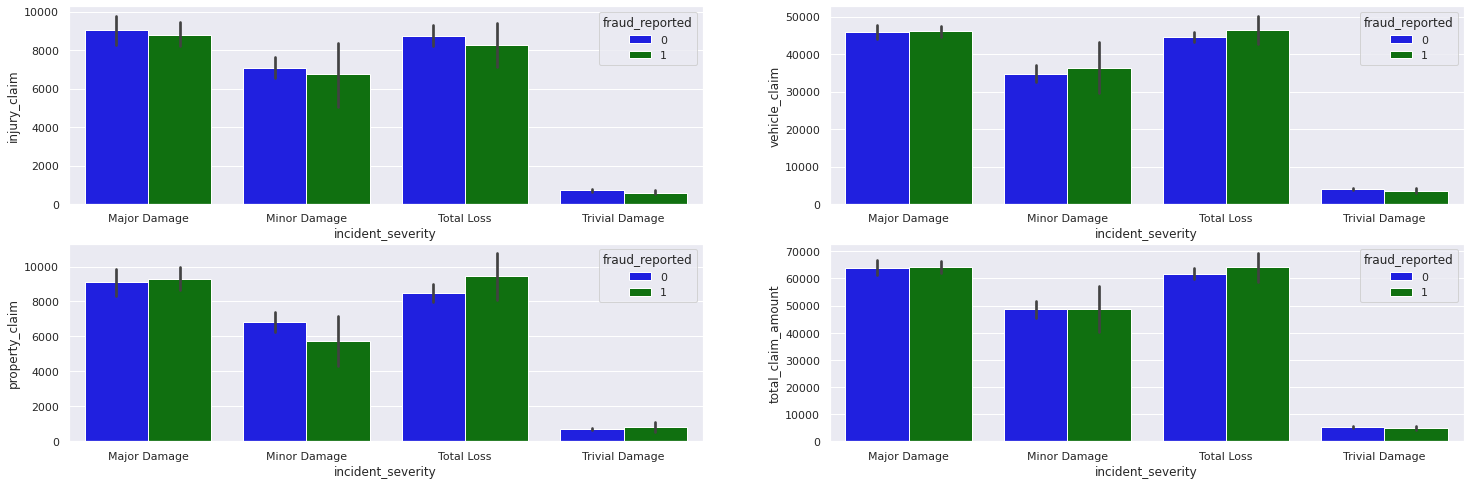

In [183]:
fig, axes = plt.subplots(2,2, figsize=(25,8))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", data=data,  ax=axes[0][0],palette=['blue','green']);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", data=data, ax=axes[0][1],palette=['blue','green']);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", data=data, ax=axes[1][0],palette=['blue','green']);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", data=data,  ax=axes[1][1],palette=['blue','green']);

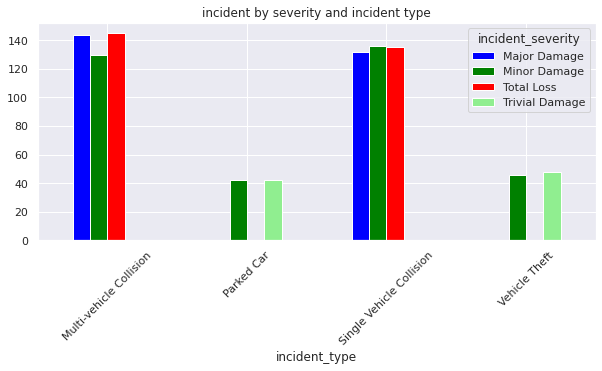

In [184]:
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(data['incident_type'], data['incident_severity'])
incident.plot(kind='bar',figsize=(10,4),color=['blue','green','red','lightgreen'])
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");


Text(0.5, 1.0, 'incident by severity and collision type')

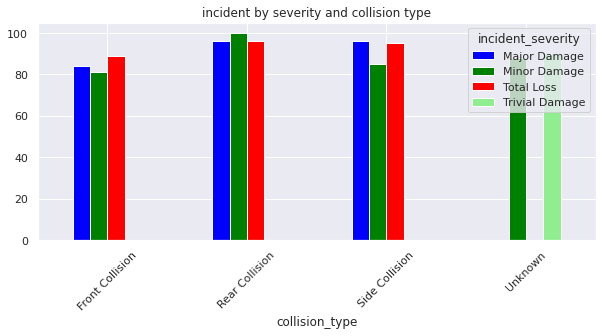

In [185]:
incident = pd.crosstab(data['collision_type'], data['incident_severity'])
incident.plot(kind='bar',  figsize=(10,4),color=['blue','green','red','lightgreen'])
plt.xticks(rotation=45)
plt.title("incident by severity and collision type")

Text(0.5, 1.0, 'incident by severity and automake')

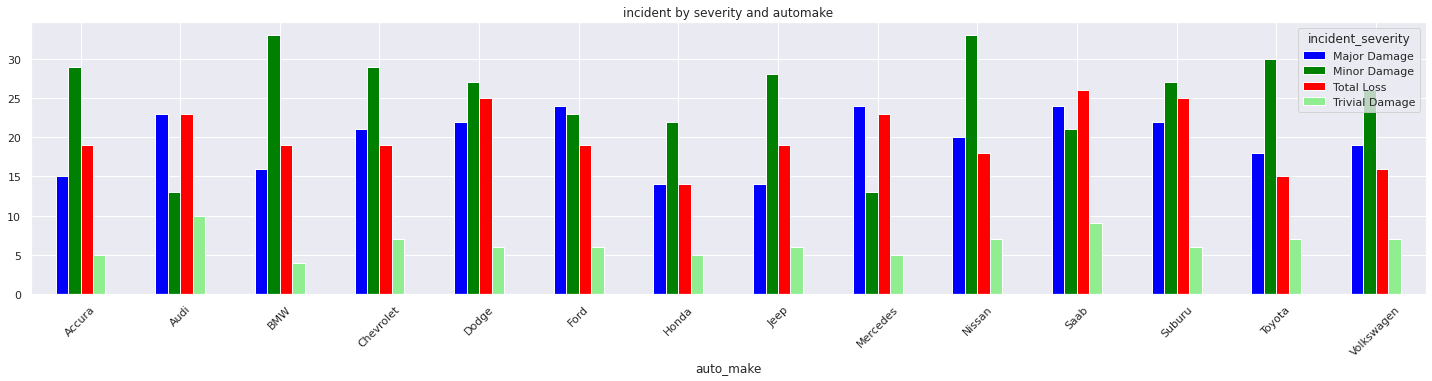

In [186]:
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(data['auto_make'],data['incident_severity'])
incident.plot(kind='bar',figsize=(25,5),color=['blue','green','red','lightgreen'])
plt.xticks(rotation=45)
plt.title("incident by severity and automake")

<h2> Checking for Outliers</h2> 

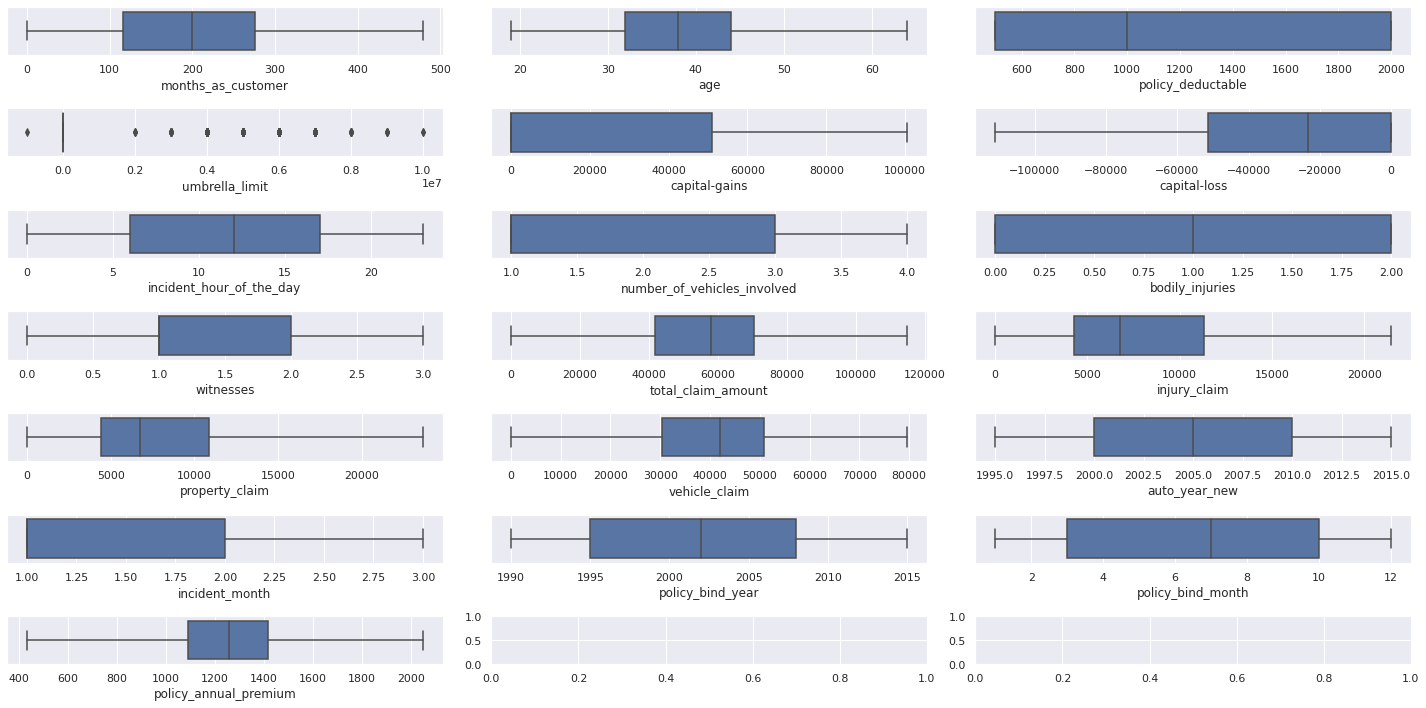

In [187]:

# Checking for Extreme Outliers in data

fig,ax=plt.subplots(7,3,figsize=(20,10))

i,j=0,0
for col in num_index:
    sns.boxplot(data[col],ax=ax[i,j],whis=3)
    j+=1
    if j==3:
        i+=1
        j=0

fig.tight_layout()

In [188]:
# creating bins for umbrella_limit

quantile_list = [0, .25, .5, .75, 1.]
quantiles = data["umbrella_limit"].quantile(quantile_list)
quantiles

0.00    -1000000.0
0.25           0.0
0.50           0.0
0.75           0.0
1.00    10000000.0
Name: umbrella_limit, dtype: float64

In [189]:
# 0 means no umbrella_limit and 1 means there is umbrella_limit

data["umbrella_limit"] = np.where(data["umbrella_limit"] > 0, 1, 0)

In [190]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,auto_year_new,incident_month,policy_bind_year,policy_bind_month
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,1,2004,1,2014,10
1,228,42,IN,250/500,2000,1197.22,1,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,unknown,0,0,unknown,5070,780,780,3510,Mercedes,E400,1,2007,1,2006,6
2,134,29,OH,100/300,2000,1413.14,1,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,0,2007,2,2000,9
3,256,41,IL,250/500,2000,1415.74,1,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,2014,1,1990,5
4,228,44,IL,500/1000,1000,1583.91,1,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,0,2009,2,2014,6


 <h2> 4 Hypothesis Testing</h2>

# Null  Hypothesis (HO) - There is no  relation between outcome variable and auto_model categorical variable
# Alternative Hypothesis (H1) - There  is relation between outcome variable and auto_model categorical variable

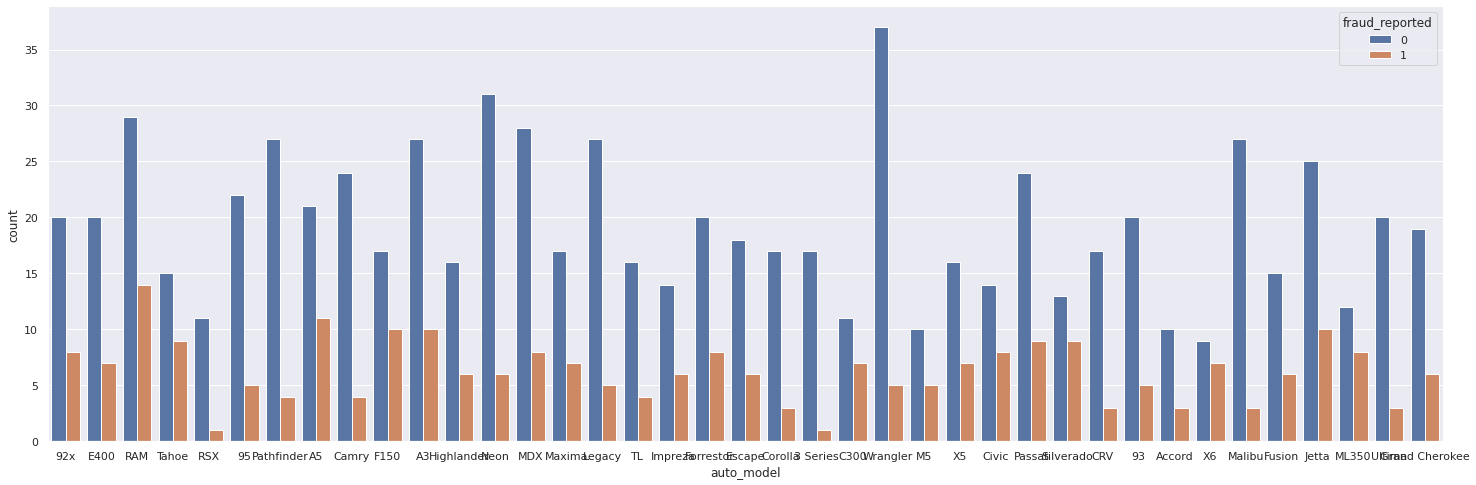

In [191]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="auto_model", data=data, hue="fraud_reported")

In [192]:
# contingency table 
automodel=pd.crosstab(index=data['auto_model'],columns=data['fraud_reported'])

In [193]:
#shape of the contingency table 
automodel.shape

(39, 2)

In [194]:
# get index 
automodel.iloc[20].values

array([25, 10])

In [195]:
from scipy import stats
(chi2,p,dof,_)= stats.chi2_contingency([automodel.iloc[0].values,automodel.iloc[1].values,automodel.iloc[2].values,
                                       automodel.iloc[3].values,automodel.iloc[4].values,automodel.iloc[5].values,
                                       automodel.iloc[6].values,automodel.iloc[7].values,automodel.iloc[8].values,
                                       automodel.iloc[9].values,automodel.iloc[10].values,automodel.iloc[11].values,
                                       automodel.iloc[12].values,automodel.iloc[13].values,automodel.iloc[14].values,
                                       automodel.iloc[15].values,automodel.iloc[16].values,automodel.iloc[17].values,
                                       automodel.iloc[18].values,automodel.iloc[19].values,automodel.iloc[20].values,
                                       automodel.iloc[21].values,automodel.iloc[22].values,automodel.iloc[23].values,
                                       automodel.iloc[24].values,automodel.iloc[25].values,automodel.iloc[26].values,
                                       automodel.iloc[27].values,automodel.iloc[28].values,automodel.iloc[29].values,
                                       automodel.iloc[30].values,automodel.iloc[31].values,automodel.iloc[32].values,
                                       automodel.iloc[33].values,automodel.iloc[34].values,automodel.iloc[35].values,
                                       automodel.iloc[36].values,automodel.iloc[37].values,automodel.iloc[38].values])

In [196]:
print("chi2 :",chi2)
print("p_value :",p)
print("Degree of freedom :",dof)

chi2 : 46.65817014569841
p_value : 0.15826457876312205
Degree of freedom : 38


In [197]:
# since p value is 0.15 so we failed to reject null hypothesis

In [198]:
# as result of chi square test, drop auto_model
data=data.drop(['auto_model'],axis=1)

In [199]:
# Encoding 

<h2> 5. Feature Engineering </h2> 
<p> 1. Data Encoding </p>
<p> 2. Data Scaling </p>
<p> 3. SMOTE Analysis </p>

<p> 1. Data Encoding </p>

In [200]:
# One Hot Encoding
sex_map={'MALE':1,'FEMALE':0}
data.insured_sex=data.insured_sex.map(sex_map)


In [201]:
# Mean Encoding for normal data
#It gives mean of fraud_reported value of each unique value of particulary col
policy_state_map=data.groupby(['policy_state'])['fraud_reported'].mean().to_dict()
#  eg. policy_state_map = { 'IL': 0.22781065088757396,'IN': 0.25483870967741934,'OH': 0.2585227272727273 }
data.policy_state=data.policy_state.map(policy_state_map)

policy_csl_map=data.groupby(['policy_csl'])['fraud_reported'].mean().to_dict()
data.policy_csl=data.policy_csl.map(policy_csl_map)

insured_hobby_map=data.groupby(['insured_hobbies'])['fraud_reported'].mean().to_dict()
data.insured_hobbies=data.insured_hobbies.map(insured_hobby_map)

insured_relation_map=data.groupby(['insured_relationship'])['fraud_reported'].mean().to_dict()
data.insured_relationship=data.insured_relationship.map(insured_relation_map)

collision_map=data.groupby(['collision_type'])['fraud_reported'].mean().to_dict()
data.collision_type=data.collision_type.map(collision_map)

incident_state_map=data.groupby(['incident_state'])['fraud_reported'].mean().to_dict()
data.incident_state=data.incident_state.map(incident_state_map)

incident_city_map=data.groupby(["incident_city"])['fraud_reported'].mean().to_dict()
data.incident_city=data.incident_city.map(incident_city_map)

auto_make_map=data.groupby(["auto_make"])['fraud_reported'].mean().to_dict()
data.auto_make=data.auto_make.map(auto_make_map)

property_damage_map=data.groupby(["property_damage"])['fraud_reported'].mean().to_dict()
data.property_damage=data.property_damage.map(property_damage_map)

police_report_available_map=data.groupby(["police_report_available"])['fraud_reported'].mean().to_dict()
data.police_report_available=data.police_report_available.map(police_report_available_map)


In [202]:
# Target Guided Ordinal Encoding

occupation_map={j:i+5 for i,j in enumerate(data.groupby(["insured_occupation"])['fraud_reported'].mean().sort_values().index)}
data.insured_occupation=data.insured_occupation.map(occupation_map)

severity_map={j:i+5 for i,j in enumerate(data.groupby(["incident_severity"])['fraud_reported'].mean().sort_values().index)}
data.incident_severity=data.incident_severity.map(severity_map)

authorities_map={j:i+5 for i,j in enumerate(data.groupby(["authorities_contacted"])['fraud_reported'].mean().sort_values().index)}
data.authorities_contacted=data.authorities_contacted.map(authorities_map)

In [203]:
# Freq encoding 

incident_type_map=data.incident_type.value_counts().to_dict()
data.incident_type=data.incident_type.map(incident_type_map)

# Ordinal encoding 

education_map={'High School':1,'College':2,'Associate':3,'Masters':4,'JD':5,'MD':6,'PhD':7}
data.insured_education_level=data.insured_education_level.map(education_map)


In [204]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

<p> 2. Data Scaling  </p>

In [205]:
# Applying MinMaxScaler on continuous features

scaler = MinMaxScaler()

In [206]:
data_unscaled = data.copy()

In [207]:
data["months_as_customer"] = scaler.fit_transform(data[["months_as_customer"]])
data["age"] = scaler.fit_transform(data[["age"]])
data["policy_annual_premium"] = scaler.fit_transform(data[["policy_annual_premium"]])

In [208]:
data["injury_claim"] = scaler.fit_transform(data[["injury_claim"]])
data["property_claim"] = scaler.fit_transform(data[["property_claim"]])
data["vehicle_claim"] = scaler.fit_transform(data[["vehicle_claim"]])
data['total_claim_amount']= scaler.fit_transform(data[['total_claim_amount']])

In [209]:
data["policy_bind_year"] = scaler.fit_transform(data[["policy_bind_year"]])

In [210]:
data["auto_year_new"] = scaler.fit_transform(data[["auto_year_new"]])

In [211]:
data["capital-gains"] = scaler.fit_transform(data[["capital-gains"]])
data["capital-loss"] = scaler.fit_transform(data[["capital-loss"]])

In [212]:
data['incident_hour_of_the_day']= scaler.fit_transform(data[['incident_hour_of_the_day']])
data['number_of_vehicles_involved']= scaler.fit_transform(data[['number_of_vehicles_involved']])
data['bodily_injuries']=scaler.fit_transform(data[['bodily_injuries']])
data['witnesses']=scaler.fit_transform(data[['witnesses']])
data['incident_month']=scaler.fit_transform(data[['incident_month']])
data['policy_bind_month']=scaler.fit_transform(data[['policy_bind_month']])


In [213]:
data['incident_type']=scaler.fit_transform(data[['incident_type']])
data['umbrella_limit']=scaler.fit_transform(data[['umbrella_limit']])
data['incident_severity']=scaler.fit_transform(data[['incident_severity']])
data['authorities_contacted']=scaler.fit_transform(data[['authorities_contacted']])
data['insured_education_level']=scaler.fit_transform(data[['insured_education_level']])
data['insured_occupation']=scaler.fit_transform(data[['insured_occupation']])
data['policy_deductable']=scaler.fit_transform(data[['policy_deductable']])

In [214]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,auto_year_new,incident_month,policy_bind_year,policy_bind_month
0,0.684760,0.644444,0.258523,0.262108,0.333333,0.603112,0.0,1,0.833333,0.846154,0.195122,0.205882,0.530348,1.000000,0.952239,0.253623,1.000000,0.25,0.294355,0.261745,0.217391,0.000000,0.258278,0.5,0.666667,0.229299,0.622801,0.303497,0.550063,0.654296,0.225000,1,0.45,0.0,0.96,0.818182
1,0.475992,0.511111,0.254839,0.262108,1.000000,0.473214,1.0,1,0.833333,0.461538,0.265625,0.293785,0.000000,1.000000,0.029851,0.089888,0.333333,0.25,0.227273,0.223881,0.347826,0.000000,0.286111,0.0,0.000000,0.259475,0.043285,0.036364,0.032953,0.043276,0.338462,1,0.60,0.0,0.64,0.454545
2,0.279749,0.222222,0.258523,0.257880,1.000000,0.606972,1.0,0,1.000000,0.615385,0.291667,0.213115,0.349254,1.000000,1.000000,0.311644,0.333333,0.25,0.221374,0.261745,0.304348,0.666667,0.195266,1.0,1.000000,0.250729,0.300906,0.358974,0.162653,0.289722,0.250000,0,0.60,0.5,0.40,0.727273
3,0.534447,0.488889,0.227811,0.262108,1.000000,0.608582,1.0,0,1.000000,0.538462,0.291667,0.241135,0.486567,0.438344,0.952239,0.275591,1.000000,0.25,0.434783,0.289474,0.217391,0.000000,0.286111,0.5,0.666667,0.250729,0.551298,0.295571,0.267850,0.637187,0.276316,1,0.95,0.0,0.00,0.363636
4,0.475992,0.555556,0.227811,0.216667,0.333333,0.712760,1.0,1,0.333333,0.615385,0.291667,0.241135,0.656716,0.585959,0.029851,0.089888,0.333333,0.00,0.221374,0.289474,0.869565,0.000000,0.195266,0.0,0.333333,0.250729,0.055739,0.060606,0.027461,0.056359,0.191176,0,0.70,0.5,0.96,0.454545


In [215]:
# Finding Higly Correlated Columns

def correlation(data,threshold):
    col_corr=set()
    cor=data.corr()
    for i in range(len(cor.columns)):
        for j in range(len(cor.columns)):
            if (abs(cor.iloc[i,j]) > threshold) and i!=j:
                if (cor.columns[j] in col_corr) or (cor.columns[i] in col_corr):
                    continue
                print("\n",cor.columns[i],"-----",cor.columns[j])
                print(abs(cor.iloc[i,j]))
                colname=cor.columns[i]
                col_corr.add(colname)
    return col_corr

a=correlation(data.drop(['fraud_reported'],axis=1),0.8)
print('\n',a)


 months_as_customer ----- age
0.9220983225789815

 incident_type ----- collision_type
0.9551929841805376

 total_claim_amount ----- injury_claim
0.8050253630561779

 {'months_as_customer', 'total_claim_amount', 'incident_type'}


In [216]:
data=data.drop(['age','collision_type','injury_claim'],axis=1)

<p> 3. SMOTE Analysis </p>

In [217]:
from imblearn.over_sampling import SMOTE

X=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']
smote=SMOTE(k_neighbors=12,sampling_strategy='minority')
X_smote,y_smote=smote.fit_resample(X,y)

In [218]:
df=pd.DataFrame(y_smote)
df

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
1501,1
1502,1
1503,1
1504,1


Text(0.5, 1.0, 'After smote')

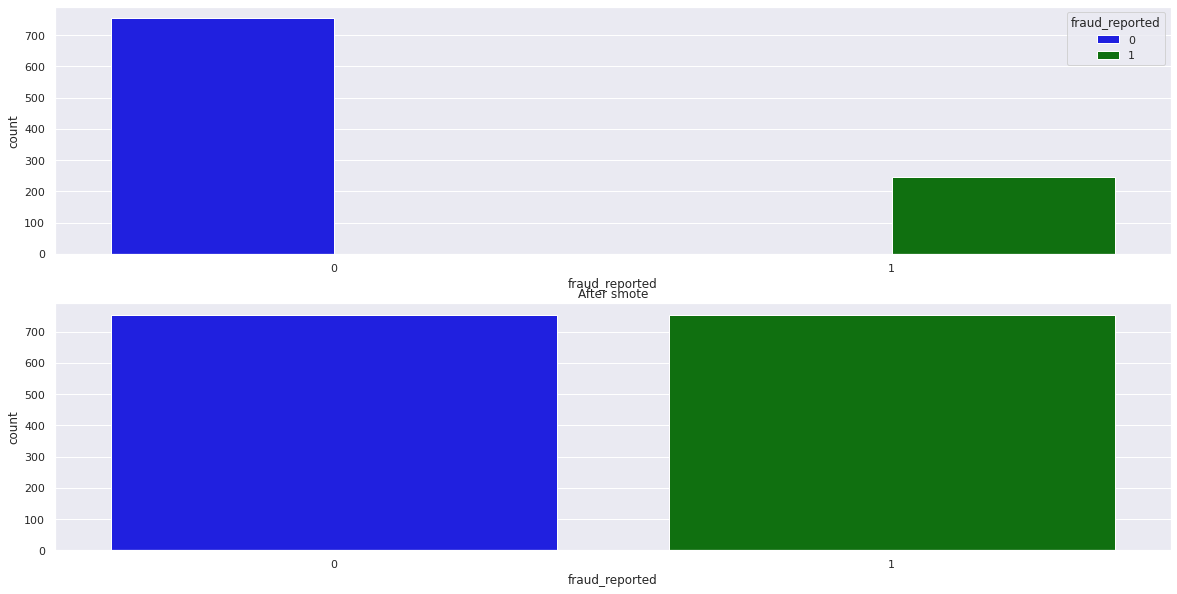

In [219]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharey=True)
sns.countplot("fraud_reported", hue="fraud_reported",data=data, ax=axes[0],palette=['blue','green'])
sns.countplot("fraud_reported",data=df, ax=axes[1],palette=['blue','green'])
plt.title("After smote")


In [220]:
data=pd.merge(X_smote,y_smote,left_index=True,right_index=True)
datadata=pd.merge(X_smote,y_smote,left_index=True,right_index=True)
data

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,property_claim,vehicle_claim,auto_make,auto_year_new,incident_month,policy_bind_year,policy_bind_month,fraud_reported
0,0.684760,0.258523,0.262108,0.333333,0.603112,0.000000,1,0.833333,0.846154,0.195122,0.205882,0.530348,1.000000,0.952239,1.000000,0.250000,0.294355,0.261745,0.217391,0.000000,0.258278,0.500000,0.666667,0.229299,0.622801,0.550063,0.654296,0.225000,0.450000,0.0,0.960000,0.818182,1
1,0.475992,0.254839,0.262108,1.000000,0.473214,1.000000,1,0.833333,0.461538,0.265625,0.293785,0.000000,1.000000,0.029851,0.333333,0.250000,0.227273,0.223881,0.347826,0.000000,0.286111,0.000000,0.000000,0.259475,0.043285,0.032953,0.043276,0.338462,0.600000,0.0,0.640000,0.454545,1
2,0.279749,0.258523,0.257880,1.000000,0.606972,1.000000,0,1.000000,0.615385,0.291667,0.213115,0.349254,1.000000,1.000000,0.333333,0.250000,0.221374,0.261745,0.304348,0.666667,0.195266,1.000000,1.000000,0.250729,0.300906,0.162653,0.289722,0.250000,0.600000,0.5,0.400000,0.727273,0
3,0.534447,0.227811,0.262108,1.000000,0.608582,1.000000,0,1.000000,0.538462,0.291667,0.241135,0.486567,0.438344,0.952239,1.000000,0.250000,0.434783,0.289474,0.217391,0.000000,0.286111,0.500000,0.666667,0.250729,0.551298,0.267850,0.637187,0.276316,0.950000,0.0,0.000000,0.363636,1
4,0.475992,0.227811,0.216667,0.333333,0.712760,1.000000,1,0.333333,0.615385,0.291667,0.241135,0.656716,0.585959,0.029851,0.333333,0.000000,0.221374,0.289474,0.869565,0.000000,0.195266,0.000000,0.333333,0.250729,0.055739,0.027461,0.056359,0.191176,0.700000,0.5,0.960000,0.454545,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.610611,0.240980,0.242624,0.333333,0.577485,0.000000,0,0.166667,0.670280,0.790399,0.251123,0.208206,1.000000,0.979521,0.333333,0.857196,0.278539,0.222413,0.335441,0.380810,0.247158,0.214393,0.809595,0.250729,0.581912,0.422319,0.587942,0.261284,0.878561,0.5,0.228606,0.415429,1
1502,0.285308,0.250532,0.257880,0.280215,0.376779,0.159354,0,0.526559,0.141588,0.826087,0.266214,0.256794,1.000000,0.000000,0.280215,0.039839,0.302330,0.281915,0.276634,0.000000,0.286111,0.159354,0.053118,0.252123,0.032425,0.032303,0.032786,0.287448,0.860161,0.5,0.550762,0.221290,1
1503,0.569894,0.256397,0.242886,0.000000,0.361750,0.000000,0,0.929499,0.639075,0.460789,0.243436,0.000000,1.000000,0.952239,0.717997,0.394249,0.294355,0.248227,0.658869,0.000000,0.270052,0.000000,0.000000,0.255775,0.502846,0.540766,0.497577,0.255229,0.278850,0.0,0.224638,0.870636,1
1504,0.205554,0.254839,0.254681,0.278852,0.496991,0.000000,0,0.666667,0.331350,0.182099,0.216520,0.095301,1.000000,0.952239,1.000000,0.709139,0.283391,0.221311,0.282188,0.000000,0.258278,0.500000,0.612185,0.234231,0.606087,0.315341,0.688045,0.285968,0.793762,0.5,0.693075,0.833040,1


<h2>*italicised text* 6.Modelling </h2>
<p> 1. Logistic Regression </p>
<p>2. RandomForestClassifier </p>
<p> 3. XGBoostClassifier </p>

In [221]:
#separate independent variable and target variable
X=data.loc[:,"months_as_customer":"policy_bind_month"]
y=data.fraud_reported

In [222]:
# traing the data, test_size=0.3 means testing data is 30%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [223]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)


X_train: (1054, 32)
y_train: (1054,)
X_test: (452, 32)
y_test: (452,)


In [224]:
#model_report method for finding optimal threthold for  logistic regression, randomforestclassifier,xgboost model
def model_report(model_name, model, X_train, y_train, X_test, y_test):

    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')

    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  

        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))   # should use cross validation

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
    plt.show()
  
    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []

<p> 1. Logistic Regression </p>


"""""" Logistic regression """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.6706,  0.100->0.7597,  0.200->0.7993,  0.300->0.8273,  0.400->0.8583,  0.500->0.8619,  0.600->0.8571,  0.700->0.8019,  0.800->0.6325,  0.900->0.2547,  1.000->0.0000,  
Looping decimal place 2
0.400->0.8583,  0.410->0.8537,  0.420->0.8531,  0.430->0.8548,  0.440->0.8583,  0.450->0.8600,  0.460->0.8577,  0.470->0.8630,  0.480->0.8630,  0.490->0.8642,  0.500->0.8619,  0.510->0.8690,  0.520->0.8703,  0.530->0.8697,  0.540->0.8716,  0.550->0.8668,  0.560->0.8620,  0.570->0.8614,  0.580->0.8590,  0.590->0.8578,  0.600->0.8571,  
Looping decimal place 3
0.530->0.8697,  0.531->0.8697,  0.532->0.8697,  0.533->0.8716,  0.534->0.8716,  0.535->0.8716,  0.536->0.8716,  0.537->0.8716,  0.538->0.8716,  0.539->0.8716,  0.540->0.8716,  0.541->0.8716,  0.542->0.8716,  0.543->0.8692,  0.544->0.8692,  0.545->0.8692,  0.546->0.8692,  0.547->0.8668,  

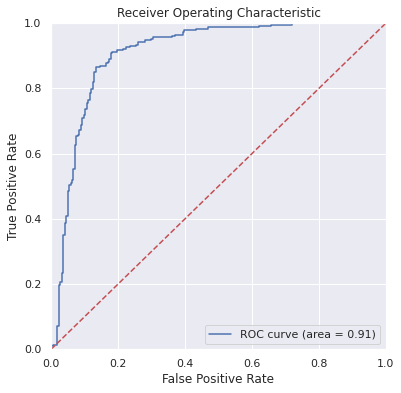

In [225]:
print('\n"""""" Logistic regression """"""')

logRe_final = LogisticRegression()
model_report('LogisticRegression', logRe_final, X_train, y_train,X_test,y_test)

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       224
           1       0.81      0.92      0.86       228

    accuracy                           0.85       452
   macro avg       0.86      0.85      0.85       452
weighted avg       0.86      0.85      0.85       452

Accuracy Score :  0.8517699115044248


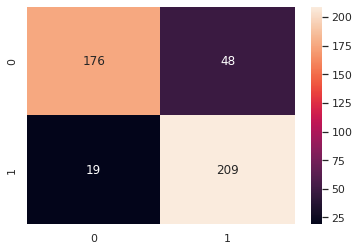

In [226]:
# classification report for logistic regression model
y_pred = logRe_final.predict(X_test)
print(classification_report(y_test, y_pred))
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

<p> 2. RandomForestClassifier</p>


"""""" RandomForestClassifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.6706,  0.100->0.7192,  0.200->0.8401,  0.300->0.9032,  0.400->0.9087,  0.500->0.9053,  0.600->0.9000,  0.700->0.8308,  0.800->0.7568,  0.900->0.5552,  1.000->0.0345,  
Looping decimal place 2
0.300->0.9032,  0.310->0.9069,  0.320->0.9069,  0.330->0.9106,  0.340->0.9084,  0.350->0.9102,  0.360->0.9057,  0.370->0.9095,  0.380->0.9091,  0.390->0.9087,  0.400->0.9087,  0.410->0.9083,  0.420->0.9061,  0.430->0.9038,  0.440->0.9038,  0.450->0.9038,  0.460->0.9038,  0.470->0.9015,  0.480->0.9015,  0.490->0.9053,  0.500->0.9030,  
Looping decimal place 3
0.320->0.9069,  0.321->0.9069,  0.322->0.9069,  0.323->0.9069,  0.324->0.9069,  0.325->0.9069,  0.326->0.9069,  0.327->0.9069,  0.328->0.9069,  0.329->0.9069,  0.330->0.9106,  0.331->0.9106,  0.332->0.9106,  0.333->0.9106,  0.334->0.9106,  0.335->0.9106,  0.336->0.9106,  0.337->0.9106

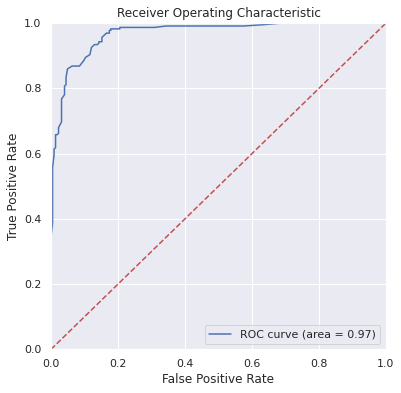

In [227]:
#before parameter tunninig 
#RandomForestClassifier
print('\n"""""" RandomForestClassifier """"""')

BP_Rfc_model = RandomForestClassifier()
model_report('RandomForestClassifier',BP_Rfc_model, X_train, y_train ,X_test ,y_test)

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

<p>Classification report for randomforestclassifier model</p> 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       224
           1       0.87      0.94      0.90       228

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452

Accuracy Score :  0.8982300884955752


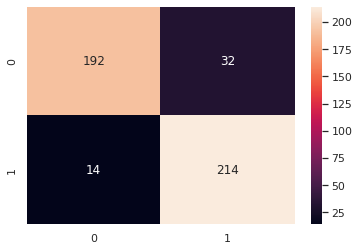

In [228]:
#classification report for randomforestclassifier model before parameter tunning 
y_pred = BP_Rfc_model.predict(X_test)

print(classification_report(y_test, y_pred))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

#### After  parameter tunning RandomForestClassifer





"""""" RandomForestClassifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.6706,  0.100->0.6867,  0.200->0.7554,  0.300->0.8610,  0.400->0.8998,  0.500->0.8851,  0.600->0.8721,  0.700->0.7835,  0.800->0.5820,  0.900->0.0921,  1.000->0.0000,  
Looping decimal place 2
0.300->0.8610,  0.310->0.8711,  0.320->0.8792,  0.330->0.8827,  0.340->0.8898,  0.350->0.8911,  0.360->0.8947,  0.370->0.8947,  0.380->0.8961,  0.390->0.8980,  0.400->0.8998,  0.410->0.9012,  0.420->0.9008,  0.430->0.8963,  0.440->0.8917,  0.450->0.8917,  0.460->0.8870,  0.470->0.8870,  0.480->0.8866,  0.490->0.8814,  0.500->0.8851,  
Looping decimal place 3
0.400->0.8998,  0.401->0.8998,  0.402->0.8998,  0.403->0.9016,  0.404->0.9016,  0.405->0.9016,  0.406->0.9035,  0.407->0.9012,  0.408->0.9012,  0.409->0.9012,  0.410->0.9012,  0.411->0.9012,  0.412->0.9012,  0.413->0.9012,  0.414->0.9012,  0.415->0.9012,  0.416->0.9012,  0.417->0.9031

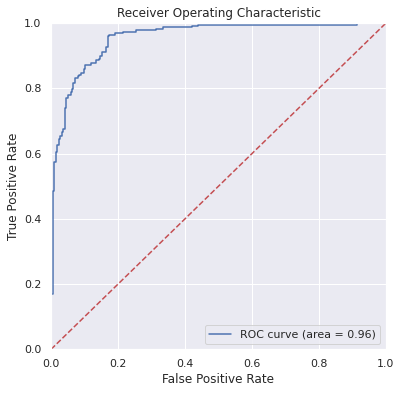

In [229]:
# After  parameter tunning RandomForestClassifer
print('\n"""""" RandomForestClassifier """"""')
#
AF_Rfc_model= RandomForestClassifier(n_estimators=150,max_depth=6, criterion='entropy',random_state=30)
model_report('RandomForestClassifier',AF_Rfc_model, X_train, y_train ,X_test ,y_test)

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       224
           1       0.86      0.91      0.89       228

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452

Accuracy Score :  0.8805309734513275


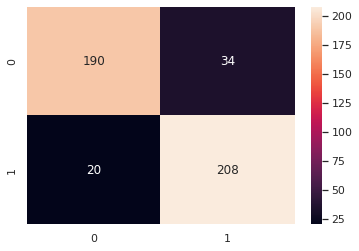

In [230]:
#classification report for randomforestclassifer after paramter tunning 
y_pred = AF_Rfc_model.predict(X_test)

print(classification_report(y_test, y_pred))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

 <p> 3. XGBoostClassifier Before Parameter Tunning </p>




"""""" XGBoostClassifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.6706,  0.100->0.8642,  0.200->0.8898,  0.300->0.9023,  0.400->0.9072,  0.500->0.9060,  0.600->0.9099,  0.700->0.8919,  0.800->0.8706,  0.900->0.7959,  1.000->0.0000,  
Looping decimal place 2
0.500->0.9060,  0.510->0.9079,  0.520->0.9056,  0.530->0.9056,  0.540->0.9075,  0.550->0.9048,  0.560->0.9087,  0.570->0.9127,  0.580->0.9103,  0.590->0.9103,  0.600->0.9099,  0.610->0.9051,  0.620->0.9027,  0.630->0.9022,  0.640->0.9022,  0.650->0.8998,  0.660->0.8969,  0.670->0.8944,  0.680->0.8919,  0.690->0.8919,  0.700->0.8919,  
Looping decimal place 3
0.560->0.9087,  0.561->0.9087,  0.562->0.9107,  0.563->0.9107,  0.564->0.9107,  0.565->0.9107,  0.566->0.9107,  0.567->0.9107,  0.568->0.9107,  0.569->0.9127,  0.570->0.9127,  0.571->0.9127,  0.572->0.9127,  0.573->0.9103,  0.574->0.9103,  0.575->0.9103,  0.576->0.9103,  0.577->0.9103,  0.

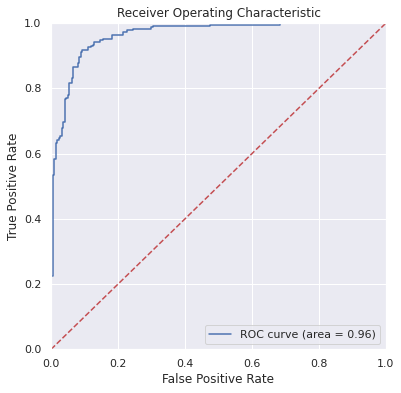

In [231]:
# Before parameter tunning XGBoostClassifier
print('\n"""""" XGBoostClassifier """"""')

BF_xgb_model = XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1)
model_report('XgboostClassifier', BF_xgb_model, X_train, y_train, X_test, y_test)

model_list.append('XGBoostClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

#### Classification report before paramter *tunning*

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       224
           1       0.88      0.93      0.91       228

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452

Accuracy Score :  0.9026548672566371


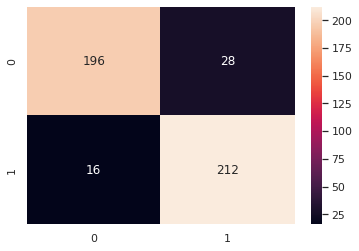

In [232]:
#accuracy 
y_pred = BF_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

###XGBoostClassifier After Paramter Tunning





"""""" XGBoostClassifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.6706,  0.100->0.6706,  0.200->0.6706,  0.300->0.6706,  0.400->0.6706,  0.500->0.8767,  0.600->0.0000,  0.700->0.0000,  0.800->0.0000,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.400->0.6706,  0.410->0.6706,  0.420->0.6706,  0.430->0.6706,  0.440->0.6706,  0.450->0.6706,  0.460->0.6706,  0.470->0.6706,  0.480->0.8773,  0.490->0.8819,  0.500->0.8767,  0.510->0.8643,  0.520->0.8591,  0.530->0.0000,  0.540->0.0000,  0.550->0.0000,  0.560->0.0000,  0.570->0.0000,  0.580->0.0000,  0.590->0.0000,  0.600->0.0000,  
Looping decimal place 3
0.480->0.8773,  0.481->0.8773,  0.482->0.8780,  0.483->0.8780,  0.484->0.8780,  0.485->0.8776,  0.486->0.8811,  0.487->0.8838,  0.488->0.8782,  0.489->0.8819,  0.490->0.8819,  0.491->0.8814,  0.492->0.8790,  0.493->0.8793,  0.494->0.8745,  0.495->0.8745,  0.496->0.8758,  0.497->0.8758,  0.

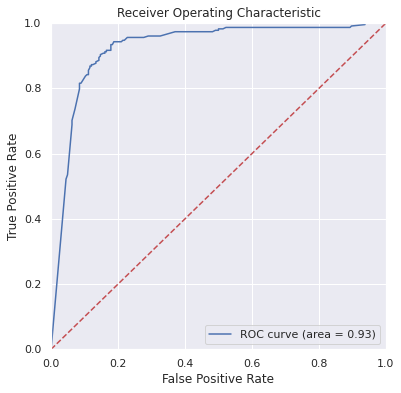

In [233]:
# After paramter tunning XGBoostClassifier
print('\n"""""" XGBoostClassifier """"""')

AF_xgb_model= XGBClassifier( gamma=0.01, learning_rate=0.0005, max_depth=15, min_child_weight=1)
model_report('XgboostClassifier', AF_xgb_model, X_train, y_train, X_test, y_test)

model_list.append('XGBoostClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

### Classification report after paramter tunning *italicised text*

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       224
           1       0.88      0.87      0.87       228

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

Accuracy Score :  0.8738938053097345


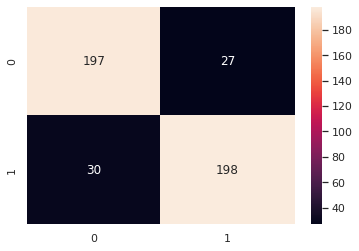

In [234]:
y_pred = AF_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

<h2> References <h2>
 <pre>
 
   1.  https://seaborn.pydata.org/tutorial/categorical.html [visualization]
   2.  https://plotly.com/python/v4-migration/ [interactive visualization]
   2.1 chi square Test-feature selection [ ALEngineering channel]
   3.  https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28 [ Handling                         imbalance dataset]  
   3.1  https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/ [handling imbalance data]
   3.2 https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ [ handling imbalanced                  data]                            
   4. https://www.youtube.com/watch?v=fxw_Ak4t-LY [types of encoding]

   4.1 https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv   [ mean encoding          concept] 
   5. https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/ [threshold value]
   5.1 https://www.youtube.com/watch?v=_AjhdXuXEDE  [finding optimal
           threshold  for classification]
   5.1 https://numpy.org/doc/stable/reference/generated/numpy.linspace.html  [ numpy package for computation ]
   5.3 https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison
   
   6.https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15 
            [model evaluation metrics]
   
  7. Robust logistic regression for insurance risk classification (repec.org)
  8.Vehicle insurance — Random forest classifier | Aviral Bhardwaj | Medium | Medium
    Accuracy vs. F1-Score. A comparison between Accuracy and… | by Purva Huilgol | Analytics Vidhya | Medium
    </pre>